In [1]:
import pandas as pd
import regex as re
import numpy as np
import math
import enchant
import nltk
import time
from nltk.stem import PorterStemmer
import pickle
from nltk.stem.wordnet import WordNetLemmatizer

In [4]:
x = pd.read_csv('base_pharmacy_answers.csv')
x=x.sort_values(['visitor_id','id'],ascending=[True,True]).reset_index(drop=True)
y=x.drop_duplicates('id','first').reset_index(drop=True)
visitorAggregated = pd.DataFrame(y.groupby("visitor_id")["id"].count()).reset_index()
visitorSorted = visitorAggregated.sort_values(['id'],ascending=[False]).reset_index(drop=True)
t=pd.merge(y,visitorSorted, on='visitor_id', how='inner')

In [3]:
import matplotlib.pyplot as plt
features = pd.read_csv('user_features.csv')

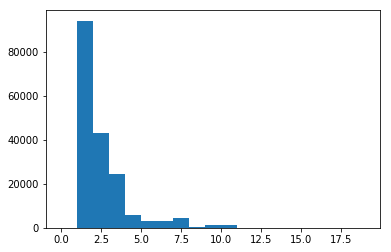

In [9]:
plt.hist(list(features.total_answers),bins=list(range(20)))
plt.show()

In [7]:
list(range(20))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [119]:
len(features.visitor_id.unique())

182030

In [10]:
feat=features.drop('Unnamed: 0',1)

In [11]:
feat

,visitor_id,total_answers,free_text_answers,negative_ft_answers,total_ft_words,total_english_ft_words,total_auto_suggest,total_auto_suggest_words,total_english_as_words
0,7738d904-01e5-4c90-cc31-8550e5714895_acce55_14...,1,0,0,0,0,0,0,0
1,9380a8c3-03be-4c22-ccde-f0bf37cbd808_acce55_14...,1,0,0,0,0,0,0,0
2,b642f1d8-fdfa-4444-c432-987508e0f110_acce55_14...,3,0,0,0,0,0,0,0
3,85510fa4-759c-4dee-cd50-558677193e87_acce55_14...,1,0,0,0,0,0,0,0
4,9a030ad0-5236-4239-c27a-97cb740d670c_acce55_14...,1,0,0,0,0,0,0,0
5,140ded37-cb9d-4bcd-cb72-727aa3739b8b_acce55_14...,1,0,0,0,0,0,0,0
6,6bf6b749-5a9d-4995-c94d-221dd891de57_acce55_14...,1,0,0,0,0,0,0,0
7,96c07a4f-293a-4c41-cc9e-7f7c9ae63e06_acce55_14...,2,0,0,0,0,0,0,0
8,c432f53e-dda7-4323-c31c-527fe13ed089_acce55_14...,2,0,0,0,0,0,0,0
9,b8e61ee0-a931-4b48-cbbc-771812cbb84c_acce55_14...,1,0,0,0,0,0,0,0


In [8]:
score = []
for i in range(len(feat)):
    
    if (feat.total_answers[i]>1) or (feat.free_text_answers[i]>0):
        score.append(1)
    else:
        score.append(0)
        

In [9]:
feat['score']=score
feat.head(100)

,visitor_id,total_answers,free_text_answers,negative_ft_answers,total_ft_words,total_english_ft_words,total_auto_suggest,total_auto_suggest_words,total_english_as_words,score
0,7738d904-01e5-4c90-cc31-8550e5714895_acce55_14...,1,0,0,0,0,0,0,0,0
1,9380a8c3-03be-4c22-ccde-f0bf37cbd808_acce55_14...,1,0,0,0,0,0,0,0,0
2,b642f1d8-fdfa-4444-c432-987508e0f110_acce55_14...,3,0,0,0,0,0,0,0,1
3,85510fa4-759c-4dee-cd50-558677193e87_acce55_14...,1,0,0,0,0,0,0,0,0
4,9a030ad0-5236-4239-c27a-97cb740d670c_acce55_14...,1,0,0,0,0,0,0,0,0
5,140ded37-cb9d-4bcd-cb72-727aa3739b8b_acce55_14...,1,0,0,0,0,0,0,0,0
6,6bf6b749-5a9d-4995-c94d-221dd891de57_acce55_14...,1,0,0,0,0,0,0,0,0
7,96c07a4f-293a-4c41-cc9e-7f7c9ae63e06_acce55_14...,2,0,0,0,0,0,0,0,1
8,c432f53e-dda7-4323-c31c-527fe13ed089_acce55_14...,2,0,0,0,0,0,0,0,1
9,b8e61ee0-a931-4b48-cbbc-771812cbb84c_acce55_14...,1,0,0,0,0,0,0,0,0


In [10]:
abc = feat.drop(feat.columns[1:9],1)
abc.head(10)

,visitor_id,score
0,7738d904-01e5-4c90-cc31-8550e5714895_acce55_14...,0
1,9380a8c3-03be-4c22-ccde-f0bf37cbd808_acce55_14...,0
2,b642f1d8-fdfa-4444-c432-987508e0f110_acce55_14...,1
3,85510fa4-759c-4dee-cd50-558677193e87_acce55_14...,0
4,9a030ad0-5236-4239-c27a-97cb740d670c_acce55_14...,0
5,140ded37-cb9d-4bcd-cb72-727aa3739b8b_acce55_14...,0
6,6bf6b749-5a9d-4995-c94d-221dd891de57_acce55_14...,0
7,96c07a4f-293a-4c41-cc9e-7f7c9ae63e06_acce55_14...,1
8,c432f53e-dda7-4323-c31c-527fe13ed089_acce55_14...,1
9,b8e61ee0-a931-4b48-cbbc-771812cbb84c_acce55_14...,0


In [11]:
z=pd.merge(abc,t,how='inner',on='visitor_id')

In [12]:
len(z)

379574

In [298]:
df_2 = z[z.q_id==2].reset_index(drop=True)
df_2.text.unique()

array(['Moderately effective', 'Effective', "Can't say", 'Not effective'], dtype=object)

In [772]:
#How much this medicine was effective?
di = dict()
for i in list(set(df_2.entity_id)):
    e,m,cn,n,xxx = 0,0,0,0,0
    df = df_2[(df_2.entity_id==i)].reset_index(drop=True)
    
    
    for j in range(len(df)):
        #xxx+=float(df.score[j])
        
        if df.text[j]=='Effective':
            e+=df.score[j]
            
        if df.text[j]=='Moderatively effective':
            m+=df.score[j]
        if df.text[j]=="Can't say":
            cn+=df.score[j]
        if df.text[j]=="Not effective":
            n+=df.score[j]
    
    di[i]={'Effective':e,'Moderatively effective':m,'Cant say':cn,'Not effective':n}
    
db2 = pd.DataFrame(data=None)
db2['entity_id']=list(di.keys())
db2['q_id']=2
   

    

In [300]:
#did you find this medicine costly?
df_3 = z[z.q_id==3]
d_3 = dict()

for i in list(set(df_3.entity_id)):
    e,m = 0,0
    df = df_3[(df_3.entity_id==i)].reset_index(drop=True)
    
    
    for j in range(len(df)):
        
        if  df.text[j]=='Yes':
            e+=df.score[j]
        else:
            m+=df.score[j]
            
    d_3[i]={'Yes':e,'No':m}
            





In [147]:
t[t.q_id==3].apply(lambda x:sum(x.isnull()))

id_x          0
visitor_id    0
is_guest      0
q_id          0
text          0
entity_id     0
is_visible    0
created       0
id_y          0
dtype: int64

In [314]:
df_sku_sym = pd.read_csv('sku_id2symptoms.csv')

In [301]:
d_3

{294913: {'No': 0, 'Yes': 1},
 65537: {'No': 2, 'Yes': 1},
 294915: {'No': 1, 'Yes': 0},
 65540: {'No': 0, 'Yes': 3},
 32772: {'No': 1, 'Yes': 2},
 229380: {'No': 1, 'Yes': 0},
 131079: {'No': 0, 'Yes': 1},
 32776: {'No': 0, 'Yes': 2},
 131086: {'No': 5, 'Yes': 5},
 32785: {'No': 0, 'Yes': 1},
 65555: {'No': 0, 'Yes': 5},
 32788: {'No': 1, 'Yes': 1},
 163861: {'No': 3, 'Yes': 0},
 65558: {'No': 1, 'Yes': 0},
 65562: {'No': 5, 'Yes': 7},
 65569: {'No': 3, 'Yes': 0},
 229411: {'No': 1, 'Yes': 0},
 65573: {'No': 23, 'Yes': 5},
 229421: {'No': 0, 'Yes': 1},
 196655: {'No': 0, 'Yes': 2},
 32815: {'No': 1, 'Yes': 0},
 229423: {'No': 1, 'Yes': 0},
 131128: {'No': 1, 'Yes': 1},
 65592: {'No': 1, 'Yes': 0},
 262203: {'No': 1, 'Yes': 0},
 163900: {'No': 3, 'Yes': 2},
 163901: {'No': 2, 'Yes': 4},
 65598: {'No': 1, 'Yes': 2},
 294971: {'No': 0, 'Yes': 1},
 163910: {'No': 1, 'Yes': 0},
 163915: {'No': 2, 'Yes': 5},
 163916: {'No': 0, 'Yes': 1},
 65615: {'No': 1, 'Yes': 3},
 65618: {'No': 0, 'Yes':

In [369]:
#for question id 4

df_4 = z[z.q_id==4].reset_index(drop=True)
print (len(df_4))
df_4.text = df_4.text.astype('str').apply(lambda x:x.lower())

d4_tags = dict()
v=0
for i in list(set(df_4.entity_id)):
    e,m = 0,0
    df = df_4[(df_4.entity_id==i)].reset_index(drop=True)
    
    
    x=[]
    for j in range(len(df)):
        print (df.text[j])
        
        if  df.text[j].startswith('{'):
            a=(df.text[j].split(':'))
            b= re.sub(r'[{}""]','',a[1].split(':')[1])
            
            x.append(' '.join(b.split()))
            
            #print (df.text[j].split("value:")[1])
            
        else:
                
                line=' '.join((df.text)[j].split())
                print (line)
                line=line.strip().split(' ')
                ar=[]
                two_grams=[]
                
                three_grams=[]
                #text_1gram = ngrams((df.text)[j].split(),1)
                text_2grams = ngrams((df.text)[j].split(), 2)
                text_3grams = ngrams((df.text)[j].split(), 3)
                
                        
                for grams in text_2grams:
                    two_grams.append(grams)
                    if grams in sym_twograms:
                        s=''
                        for word in list(grams):
                            s=s+word+' '
                        print (s)
                        x.append(s)

                for grams in text_3grams:
                    three_grams.append(grams)
                    if grams in sym_threegrams:
                        s=''
                        for word in list(grams):
                            s=s+word+' '
                        print (s)    
                        #print (grams)
                        x.append(s)


                for word in line:
                    
                    #text=text+word+' '
                    #ar = []
                    if word in symptoms:
                        
                        x.append(word)    
            
                
            
            
    d4_tags[i]=list(set(x))
print (v)
            
    
            
            
        







13173
fever, pain
fever, pain
bp
bp
daily
daily
fatty liver
fatty liver
not used
not used
prostate
prostate
{"id": "91", "value": "benign prostatic hyperplasia (enlarged prostate)"}
uhjl
uhjl
hepatic necrosis(mild)
hepatic necrosis(mild)
blood pressure
blood pressure
blood pressure 
hypertension
hypertension
high bp
high bp
hypertension
hypertension
daily
daily
{"id": "68", "value": "increased blood pressure"}
{"id": "192", "value": "headache"}
bp
bp
{"id": "173", "value": "schizophrenia (mental disorder in which patient interpret reality abnormally)"}
go tojdbaskjdfskfj
go tojdbaskjdfskfj
eye allergy
eye allergy
diaper rash
diaper rash
12
12
infection
infection
{"id": "268", "value": "eye and ear infection"}
{"id": "10", "value": "allergic disorders"}
{"id": "10", "value": "allergic disorders"}
{"id": "261", "value": "acne (pimples)"}
eyes rash
eyes rash
skin
skin
cuts, bruises, pimples
cuts, bruises, pimples
one shot any time and it works for 24 hours.
one shot any time and it works 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:49: DeprecationWarning: generator 'ngrams' raised StopIteration



.
i am allergic to dust. it makes me sneeze very badly and my nose start running. so i keep this with me and use when required.
i am allergic to dust. it makes me sneeze very badly and my nose start running. so i keep this with me and use when required.
cold and sneeze
cold and sneeze
back pain
back pain
back pain 
along with anti-biotics to ensure stomach is not upset.
along with anti-biotics to ensure stomach is not upset.
{"id": "149", "value": "anxiety disorder"}
{"id": "163", "value": "acute attack of migraine"}
thalassemia
thalassemia
hair fall
hair fall
{"id": "255", "value": "burn"}
{"id": "168", "value": "pain"}
{"id": "77", "value": "hair loss"}
it is used for hair regrowth. it's quite effective. however, the mrp on the product is 91/-(as per the latest one that i bought at medplus as well as at a store), but there seems to be an error at ur
it is used for hair regrowth. it's quite effective. however, the mrp on the product is 91/-(as per the latest one that i bought at medp

diplomax
diplomax
nephritis
nephritis
{"id": "474", "value": "nephrotic syndrome"}
weight gain
weight gain
weight gain 
{"id": "10", "value": "allergic disorders"}
{"id": "83", "value": "rhinitis (common cold)"}
{"id": "186", "value": "cough with mucus"}
sneezing &amp; heavily running nose
sneezing &amp; heavily running nose
running nose 
type 2 diabetes
type 2 diabetes
ondero met 2.5/1000
ondero met 2.5/1000
{"id": "107", "value": "diabetic nerve disease"}
diabetes
diabetes
diabetic
diabetic
{"id": "196", "value": "pain during menstruation"}
{"id": "106", "value": "polycystic ovary syndrome (pcos)"}
arthritis
arthritis
artherites problem
artherites problem
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes) "}
{"id": "248", "value": "bacterial infections"}
acne
acne
abdominal spasm
abdominal spasm
neurology health
neurology health
{"id": "373", "value": "itching"}
ok
ok
{"id": "276", "value": "bacterial infections of external ear"}
hair folliculities
h

leg pain.and veins pain and blockage
leg pain.and veins pain and blockage
burning and pain in legs &amp; hands
burning and pain in legs &amp; hands
neuropathic pain
neuropathic pain
{"id": "478", "value": "post operative pain"}
inflamation in hand and legg
inflamation in hand and legg
{"id": "159", "value": "neuropathic pain (pain due to damage of nerves)"}
{"id": "489", "value": "leishmaniasis (type of parasitic infection)"}
{"id": "159", "value": "neuropathic pain (pain due to damage of nerves)"}
{"id": "192", "value": "headache"}
pain
pain
ent
ent
{"id": "48", "value": "piles"}
{"id": "48", "value": "piles"}
{"id": "168", "value": "pain"}
{"id": "191", "value": "fever"}
fever and heavy cold
fever and heavy cold
{"id": "187", "value": "cough"}
{"id": "192", "value": "headache "}
{"id": "191", "value": "fever"}
chest congestion
chest congestion
chest congestion 
{"id": "298", "value": "non-small cell lung cancer"}
enlarged prostate
enlarged prostate
{"id": "77", "value": "hair loss"}


i don't have idea
i have a cyst
i have a cyst
in gerd
in gerd
{"id": "42", "value": "acidity"}
{"id": "42", "value": "acidity"}
{"id": "45", "value": "stomach ulcers"}
{"id": "187", "value": "cough"}
{"id": "188", "value": "dry cough"}
{"id": "187", "value": "cough"}
anxiety spectrum
anxiety spectrum
{"id": "248", "value": "bacterial infections"}
thanks
thanks
{"id": "257", "value": "skin infections"}
{"id": "186", "value": "cough with mucus"}
{"id": "187", "value": "cough"}
cough at night
cough at night
i have dr advice
i have dr advice
hypertension
hypertension
enlarged prostat
enlarged prostat
{"id": "159", "value": "neuropathic pain (pain due to damage of nerves)"}
{"id": "269", "value": "fungal infections"}
{"id": "192", "value": "headache"}
{"id": "69", "value": "anxiety"}
{"id": "187", "value": "cough"}
{"id": "187", "value": "cough"}
{"id": "45", "value": "stomach ulcers"}
{"id": "481", "value": "dental pain"}
tooth pain
tooth pain
{"id": "193", "value": "toothache"}
{"id": "46

{"id": "103", "value": "blood clot formation after cardiac valve replacement"}
{"id": "148", "value": "depression"}
{"id": "186", "value": "cough with mucus"}
{"id": "187", "value": "cough"}
cough cold congestion
cough cold congestion
{"id": "87", "value": "ischemic stroke (decreased blood supply to brain)"}
bp
bp
{"id": "192", "value": "headache"}
{"id": "149", "value": "anxiety disorder"}
headache
headache
pubic lice
pubic lice
bp
bp
d deficiency
d deficiency
{"id": "269", "value": "fungal infections"}
in a fit
in a fit
cold
cold
{"id": "77", "value": "hair loss"}
{"id": "77", "value": "hair loss"}
{"id": "77", "value": "hair loss"}
eye dryness
eye dryness
no
no
{"id": "248", "value": "bacterial infections"}
{"id": "269", "value": "fungal infections"}
waste cream not kill fungus
waste cream not kill fungus
{"id": "78", "value": "diabetic kidney disease"}
{"id": "530", "value": "urinary tract infections (utis)"}
recommended by doctor
recommended by doctor
ptm35
ptm35
normal
normal
{"i

multifracture
osteoporosis
osteoporosis
{"id": "116", "value": "asthma"}
arthritis
arthritis
{"id": "117", "value": "arthritis"}
autoimmune desease.
autoimmune desease.
ankylosing spondilities
ankylosing spondilities
{"id": "213", "value": "rheumatoid arthritis"}
{"id": "168", "value": "pain"}
{"id": "401", "value": "inflammation of gums"}
ra
ra
{"id": "472", "value": "eye disorders"}
doctor's advice
doctor's advice
joints pain
joints pain
rheumatoid arthritis
rheumatoid arthritis
{"id": "212", "value": "ankylosing spondylitis"}
{"id": "213", "value": "rheumatoid arthritis"}
as
as
as doctor ordered
as doctor ordered
{"id": "257", "value": "skin infections"}
{"id": "77", "value": "hair loss"}
.,
.,
hypertension
hypertension
{"id": "233", "value": "organ transplantation"}
{"id": "233", "value": "organ transplantation"}
{"id": "309", "value": "gastrointestinal stromal tumour"}
{"id": "478", "value": "post operative pain"}
{"id": "116", "value": "asthma"}
anti fungal treatment
anti fungal 

na
hypertension ( 100 -150)
hypertension ( 100 -150)
prescription for b.p control to my parents
prescription for b.p control to my parents
{"id": "72", "value": "hypertensive emergency"}
liver bric and itching
liver bric and itching
{"id": "69", "value": "anxiety"}
{"id": "42", "value": "acidity"}
{"id": "192", "value": "headache"}
{"id": "409", "value": "non-alcoholic fatty liver"}
{"id": "191", "value": "fever"}
{"id": "100", "value": "cerebral edema (accumulation of excessive fluid in the brain)"}
hypertention
hypertention
post operative pain
post operative pain
post operative 
{"id": "363", "value": "infections"}
{"id": "191", "value": "fever"}
excess body ache
excess body ache
body ache 
pain in vains
pain in vains
blood pressure
blood pressure
blood pressure 
high bp
high bp
{"id": "72", "value": "hypertensive emergency"}
{"id": "43", "value": "heartburn"}
{"id": "474", "value": "nephrotic syndrome"}
no condition
no condition
high bp
high bp
high blood pressure
high blood pressur

{"id": "191", "value": "fever"}
s
s
{"id": "10", "value": "allergic disorders"}
{"id": "460", "value": "cardiac arrest"}
{"id": "55", "value": "irrigation solution for eye/nose"}
{"id": "71", "value": "glaucoma (high eye pressure)"}
{"id": "369", "value": "eye examination"}
{"id": "472", "value": "eye disorders"}
to control anxiety levels
to control anxiety levels
anxiety
anxiety
.
.
{"id": "103", "value": "blood clot formation after cardiac valve replacement"}
breathing easily and ashtma
breathing easily and ashtma
every day once
every day once
high pressure
high pressure
its an eye drop as a precautionary medicine for retinal detachment
its an eye drop as a precautionary medicine for retinal detachment
yes
yes
{"id": "256", "value": "tuberculosis"}
{"id": "359", "value": "meningococcal disease"}
urinary tract infection upper and lower respiratory infection skin and soft tissue infection
urinary tract infection upper and lower respiratory infection skin and soft tissue infection
urina

already showing alternative with rs.65/- per strip so it is just double than other brand available in the same configuration.
i have suffer blood sugar. i take this med.
i have suffer blood sugar. i take this med.
{"id": "372", "value": "dermatitis (skin rash or irritation)"}
costly
costly
not avilabile
not avilabile
gas
gas
lower down the price
lower down the price
as per doctor's advice
as per doctor's advice
{"id": "66", "value": "arrhythmias (abnormal heart beat)"}
yes
yes
{"id": "203", "value": "mouth sores (ulcers)"}
{"id": "187", "value": "cough"}
{"id": "269", "value": "fungal infections"}
as a fungicide.
as a fungicide.
{"id": "269", "value": "fungal infections"}
{"id": "42", "value": "acidity"}
infection
infection
fungal infection
fungal infection
fungal infection 
{"id": "77", "value": "hair loss"}
{"id": "181", "value": "stroke (decreased blood supply to brain)"}
{"id": "363", "value": "infections"}
{"id": "63", "value": "bloating"}
.
.
{"id": "195", "value": "joint pain"}


{"id": "156", "value": "epilepsy"}
epilepsy
epilepsy
{"id": "156", "value": "epilepsy"}
{"id": "156", "value": "epilepsy"}
{"id": "156", "value": "epilepsy"}
high sgpt and sgot level in blood test
high sgpt and sgot level in blood test
blood test 
{"id": "61", "value": "constipation"}
during vertigo attacks. but i actually have it before bed to avoid headache, spinning sensation and vertigo attacks
during vertigo attacks. but i actually have it before bed to avoid headache, spinning sensation and vertigo attacks
alcoholic liver disease
alcoholic liver disease
liver disease 
chelostrol
chelostrol
{"id": "280", "value": "liver abscesses"}
fatty liver
fatty liver
due to fatty liver
due to fatty liver
{"id": "408", "value": "alcoholic fatty liver disease"}
{"id": "346", "value": "hepatitis a"}
{"id": "408", "value": "alcoholic fatty liver disease"}
{"id": "156", "value": "epilepsy"}
{"id": "156", "value": "epilepsy"}
dd
dd
{"id": "156", "value": "epilepsy"}
fits
fits
suffering from jaunidi

behdbdhd
behdbdhd
{"id": "182", "value": "dementia in parkinson's disease (a disorder of the nervous system that causes difficulties with movement and balance)"}
furious, restlessness, abusive languages,sleepnessless
furious, restlessness, abusive languages,sleepnessless
{"id": "180", "value": "alzheimer's disease (brain disorder that affects memory and intellectual ability) dementia in parkinson's disease"}
chronic pancreatitis patient. used for food digestion
chronic pancreatitis patient. used for food digestion
for good helth
for good helth
fasting sugar level was not going fown
fasting sugar level was not going fown
sugar level 
osteoarthritis of knees
osteoarthritis of knees
{"id": "269", "value": "fungal infections"}
phosphorus binder
phosphorus binder
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes) "}
{"id": "107", "value": "diabetic nerve disease"}
high bp
high bp
{"id": "72", "value": "hypertensive emergency"}
regularly to regulate blood pr

anxiety disorders
anxiety disorders
{"id": "461", "value": "pain due to smooth muscle spasm"}
showing low sugar
showing low sugar
diabetes
diabetes
diabetes
diabetes
diabetes
diabetes
diabatic  problems
diabatic problems
due to diabetes
due to diabetes
diabetes melitus
diabetes melitus
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes) "}
its for diabetes so have to take it daily...its all because of doctor prescribed me ..more over other substitutes are also there bt doctor doesnt allows me to have them
its for diabetes so have to take it daily...its all because of doctor prescribed me ..more over other substitutes are also there bt doctor doesnt allows me to have them
dianetics
dianetics
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes) "}
type 2 diabetes
type 2 diabetes
blood sugar level
blood sugar level
blood sugar 
sugar level 
blood sugar level 
type 2 diabities
type 2 diabities
type 2 diabetes
type 2 diabetes


gfg
gfg
{"id": "158", "value": "migraine"}
{"id": "309", "value": "gastrointestinal stromal tumour"}
energy build up for body, diffency of calsium in a body
energy build up for body, diffency of calsium in a body
wound
wound
hip displcia for my pet
hip displcia for my pet
86
86
{"id": "230", "value": "kidney cancer"}
urinary tract infection
urinary tract infection
urinary tract 
tract infection 
urinary tract infection 
{"id": "191", "value": "fever"}
throat pain, nasal blockage and fever
throat pain, nasal blockage and fever
cold
cold
general skin, throat, systemic infections
general skin, throat, systemic infections
{"id": "254", "value": "typhoid fever"}
infection
infection
{"id": "361", "value": "skin regeneration"}
cold and viral
cold and viral
{"id": "481", "value": "dental pain"}
for dental purposes
for dental purposes
cough with mucus
cough with mucus
{"id": "363", "value": "infections"}
cold,cough
cold,cough
{"id": "186", "value": "cough with mucus"}
lower respiratory tract in

{"id": "148", "value": "depression"}
{"id": "148", "value": "depression"}
ok
ok
restlessness
restlessness
in acidity
in acidity
irritable bowel syndrome.
irritable bowel syndrome.
{"id": "466", "value": "restless leg syndrome"}
{"id": "186", "value": "cough with mucus"}
sleeping disorder due to mucus filled throat
sleeping disorder due to mucus filled throat
sleeping disorder 
mucus in chest
mucus in chest
{"id": "186", "value": "cough with mucus"}
{"id": "143", "value": "toxic nodular goitre"}
{"id": "172", "value": "chronic obstructive pulmonary disorder (copd)"}
for cough
for cough
{"id": "186", "value": "cough with mucus"}
{"id": "186", "value": "cough with mucus"}
thining of mucous
thining of mucous
feeling blocked
feeling blocked
throat discomfort, stomach bloating, pain in upper abdomen.
throat discomfort, stomach bloating, pain in upper abdomen.
k
k
{"id": "77", "value": "hair loss"}
{"id": "42", "value": "acidity"}
{"id": "61", "value": "constipation"}
{"id": "376", "value": "

high blood pressure.
high blood 
for thinning the blood
for thinning the blood
{"id": "186", "value": "cough with mucus"}
{"id": "103", "value": "blood clot formation after cardiac valve replacement"}
stress
stress
{"id": "398", "value": "gout"}
severe back ache
severe back ache
{"id": "376", "value": "scabies (itchy skin condition)"}
mkmki
mkmki
sciatica
sciatica
{"id": "479", "value": "muscular pain"}
hair thinning
hair thinning
{"id": "212", "value": "ankylosing spondylitis"}
pain in ankle joint
pain in ankle joint
{"id": "195", "value": "joint pain"}
tendon issue
tendon issue
{"id": "10", "value": "allergic disorders"}
any side effect ?
any side effect ?
{"id": "116", "value": "asthma"}
{"id": "194", "value": "ear pain"}
chicken gunya joint pain
chicken gunya joint pain
joint pain 
back pain
back pain
back pain 
{"id": "461", "value": "pain due to smooth muscle spasm"}
{"id": "168", "value": "pain"}
severe back pain during fever viral infection
severe back pain during fever viral i

ewqe
{"id": "191", "value": "fever"}
fever
fever
migraine and body pain
migraine and body pain
chikungunya
chikungunya
{"id": "191", "value": "fever"}
fever
fever
fever
fever
high fever
high fever
fever, headache
fever, headache
wwww
wwww
fever with body pain
fever with body pain
{"id": "191", "value": "fever"}
fever
fever
for fever
for fever
{"id": "191", "value": "fever"}
fever
fever
{"id": "191", "value": "fever"}
{"id": "191", "value": "fever"}
fever
fever
{"id": "192", "value": "headache"}
fever
fever
{"id": "191", "value": "fever"}
{"id": "168", "value": "pain"}
head ache
head ache
fever
fever
{"id": "168", "value": "pain"}
fever
fever
{"id": "176", "value": "general anaesthesia"}
high fever and joints pain
high fever and joints pain
head ache
head ache
fever
fever
{"id": "192", "value": "headache"}
high fever
high fever
fever
fever
fever
fever
{"id": "192", "value": "headache"}
{"id": "191", "value": "fever"}
{"id": "191", "value": "fever"}
cough
cough
{"id": "248", "value": "ba

hair growth 
hair loss
hair loss
hair loss 
{"id": "77", "value": "hair loss"}
adhd
adhd
have to send to relative
have to send to relative
{"id": "102", "value": "attention deficit hyperactivity disorder (attention difficulty and hyperactivity in children)"}
{"id": "195", "value": "joint pain"}
cause of more urine
cause of more urine
type 2 dm
type 2 dm
{"id": "256", "value": "tuberculosis"}
it is cheap and effective.
it is cheap and effective.
jjjj
jjjj
{"id": "82", "value": "septic shock"}
{"id": "357", "value": "hepatitis b"}
cold allergy
cold allergy
uti
uti
{"id": "530", "value": "urinary tract infections (utis)"}
{"id": "530", "value": "urinary tract infections (utis)"}
urinary infection
urinary infection
{"id": "176", "value": "general anaesthesia"}
{"id": "457", "value": "dandruff"}
{"id": "484", "value": "nerve pain"}
{"id": "196", "value": "pain during menstruation"}
bp
bp
{"id": "257", "value": "skin infections"}
{"id": "257", "value": "skin infections"}
skin colour
skin col

{"id": "167", "value": "infertility"}
pregnency
pregnency
na
na
dont  know
dont know
{"id": "167", "value": "infertility"}
qwer
qwer
pregnancy
pregnancy
bleeding cntrol in pregenency
bleeding cntrol in pregenency
{"id": "148", "value": "depression"}
during pregnancy when had a miscarriage in earlier pregnancy
during pregnancy when had a miscarriage in earlier pregnancy
zz
zz
{"id": "467", "value": "amenorrhea (absence of menses)"}
pregnancy
pregnancy
prescribed by doctors
prescribed by doctors
pregnancy
pregnancy
after iui
after iui
{"id": "113", "value": "female infertility (inability to become pregnant)"}
for pregnancy
for pregnancy
na
na
mensulation problem
mensulation problem
pregnancy
pregnancy
pregnancy
pregnancy
...
...
{"id": "246", "value": "menstural pain"}
{"id": "457", "value": "dandruff"}
neck pain
neck pain
neck pain 
neck pain
neck pain
neck pain 
{"id": "153", "value": "insomnia (difficulty in sleeping)"}
{"id": "158", "value": "migraine"}
{"id": "484", "value": "nerve 

high cholesterol
{"id": "68", "value": "increased blood pressure"}
{"id": "72", "value": "hypertensive emergency"}
t2dm
t2dm
{"id": "409", "value": "non-alcoholic fatty liver"}
for diabetes
for diabetes
using this to my mother. she is patient of pancreatitis.
using this to my mother. she is patient of pancreatitis.
type 2 diabetes
type 2 diabetes
dont know
dont know
goof
goof
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes) "}
diabers
diabers
only in traveling
only in traveling
higher sugar level during night time.
higher sugar level during night time.
sugar level 
{"id": "195", "value": "joint pain"}
{"id": "148", "value": "depression"}
{"id": "119", "value": "psoriasis (silvery scaly skin rash)"}
getting severe oneside headache and giddiness
getting severe oneside headache and giddiness
depression
depression
{"id": "69", "value": "anxiety"}
irritation in eyes
irritation in eyes
x
x
none
none
ocd
ocd
ocd
ocd
good
good
{"id": "192", "value": "headach

{"id": "83", "value": "nasal congestion (stuffy nose) "}
{"id": "83", "value": "nasal congestion (stuffy nose) "}
cold &amp; blocked nose
cold &amp; blocked nose
{"id": "83", "value": "nasal congestion (stuffy nose)"}
a
a
{"id": "256", "value": "tuberculosis"}
{"id": "144", "value": "osteoporosis in men (porous bones)"}
{"id": "313", "value": "sickle cell anemia"}
nil
nil
{"id": "95", "value": "kidney stone"}
{"id": "173", "value": "schizophrenia (mental disorder in which patient interpret reality abnormally)"}
{"id": "291", "value": "eye infections by herpes simplex virus"}
{"id": "269", "value": "fungal infections"}
wwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
wwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes) "}
{"id": "269", "value

sclerosis
sclerosis
{"id": "223", "value": "urinary bladder cancer"}
as if iam suffering from multifocal choroiditis
as if iam suffering from multifocal choroiditis
{"id": "412", "value": "myasthenia gravis (weakness and rapid fatigue of muscles)"}
for lung desease
for lung desease
lung desease
lung desease
regular condition
regular condition
{"id": "412", "value": "myasthenia gravis (weakness and rapid fatigue of muscles)"}
immune disorder
immune disorder
renal post transplant medicines
renal post transplant medicines
{"id": "68", "value": "increased blood pressure"}
pimp on my penis
pimp on my penis
redness n itching area
redness n itching area
{"id": "119", "value": "psoriasis (silvery scaly skin rash)"}
for pressure my mother is using this
for pressure my mother is using this
{"id": "67", "value": "heart attack"}
{"id": "72", "value": "hypertensive emergency"}
{"id": "72", "value": "hypertensive emergency"}
when the bp raises
when the bp raises
{"id": "149", "value": "anxiety disor

{"id": "256", "value": "tuberculosis"}
{"id": "168", "value": "pain"}
cough
cough
cough
cough
{"id": "481", "value": "dental pain"}
{"id": "72", "value": "hypertensive emergency"}
{"id": "406", "value": "swelling"}
{"id": "168", "value": "pain"}
{"id": "10", "value": "allergic disorders"}
urine problems
urine problems
{"id": "83", "value": "rhinitis (common cold)"}
{"id": "360", "value": "pneumoniae"}
{"id": "72", "value": "hypertensive emergency"}
cholera, leptospirosis ,syphilis, trachoma, lyme disease
cholera, leptospirosis ,syphilis, trachoma, lyme disease
{"id": "418", "value": "paracetamol toxicity"}
{"id": "105", "value": "type 2 diabetes"}
allergy
allergy
lung infection
lung infection
lung infection 
ibs
ibs
{"id": "45", "value": "stomach ulcers"}
{"id": "58", "value": "irritable bowel syndrome"}
{"id": "195", "value": "joint pain"}
{"id": "195", "value": "joint pain"}
when i have a back pain as i'm suffering from arthritis.
when i have a back pain as i'm suffering from arthrit

stomach pain 
{"id": "280", "value": "liver abscesses"}
{"id": "253", "value": "filariasis"}
bye
bye
{"id": "67", "value": "heart attack"}
throt infection
throt infection
{"id": "377", "value": "onchocerciasis (itchy bumps on the skin)"}
{"id": "266", "value": "conjunctivitis"}
urinary infections
urinary infections
{"id": "187", "value": "cough"}
common cold, asthma, bronchitis, dry coughing.
common cold, asthma, bronchitis, dry coughing.
{"id": "64", "value": "abdominal pain"}
{"id": "479", "value": "muscular pain"}
{"id": "480", "value": "musculo-skeletal pain"}
{"id": "287", "value": "genital herpes infection"}
{"id": "289", "value": "herpes zoster (painful skin rash around the nerves of chest and back)"}
{"id": "194", "value": "ear pain"}
i used for this ear drops it gives heavily pain, was was bleeding , for over night, to prevent this pain now, what type of medicine i have to take
i used for this ear drops it gives heavily pain, was was bleeding , for over night, to prevent this 

acidity
duodenal ulcer
duodenal ulcer
{"id": "10", "value": "allergic disorders"}
jock itch(tierrea curis)
jock itch(tierrea curis)
{"id": "257", "value": "skin infections"}
{"id": "269", "value": "fungal infections"}
depression
depression
{"id": "140", "value": "hyperthyroidism"}
{"id": "484", "value": "nerve pain"}
{"id": "472", "value": "eye disorders"}
{"id": "261", "value": "acne (pimples)"}
{"id": "471", "value": "skin disorders"}
{"id": "269", "value": "fungal infections"}
{"id": "269", "value": "fungal infections"}
{"id": "358", "value": "haemophilus influenzae type b disease"}
nasal blockage
nasal blockage
{"id": "149", "value": "anxiety disorder"}
hearing loss
hearing loss
hearing loss 
giddiness
giddiness
i felt mild attack of vertigo while travelling
i felt mild attack of vertigo while travelling
{"id": "184", "value": "head trauma"}
{"id": "191", "value": "fever"}
{"id": "169", "value": "motion sickness"}
thrombosis phlebitis
thrombosis phlebitis
piles and anal fissure
pil

fat loss, aids to convert stored fat into usable energy while prolonged dieting.
fat loss, aids to convert stored fat into usable energy while prolonged dieting.
dry eyes
dry eyes
muscular pain at my right shoulder ( shoulder pain )
muscular pain at my right shoulder ( shoulder pain )
{"id": "75", "value": "heart failure"}
fjkck k kzgxkn
fjkck k kzgxkn
ghh
ghh
arthritis
arthritis
1
1
{"id": "10", "value": "allergic disorders"}
when i got pimples on my face
when i got pimples on my face
severe cold with heavy headedness
severe cold with heavy headedness
{"id": "191", "value": "fever"}
not much but....
not much but....
{"id": "147", "value": "hyperparathyroidism"}
{"id": "256", "value": "tuberculosis"}
after cabg
after cabg
haemophilus influenzae meningitis, typhoid fever, salmonella infections
haemophilus influenzae meningitis, typhoid fever, salmonella infections
{"id": "248", "value": "bacterial infections"}
itchiness and redness in 2 year old kid
itchiness and redness in 2 year old k

{"id": "361", "value": "skin regeneration"}
{"id": "472", "value": "eye disorders"}
{"id": "529", "value": "bipolar disoder"}
{"id": "471", "value": "skin disorders"}
itching
itching
when the water cross the head
when the water cross the head
to reduce cholestrol
to reduce cholestrol
njkjh
njkjh
{"id": "132", "value": "hormone replacement therapy (hrt)"}
high blood pressure
high blood pressure
high blood 
blood pressure 
high blood pressure 
{"id": "409", "value": "non-alcoholic fatty liver"}
{"id": "49", "value": "diarrhoea"}
{"id": "194", "value": "ear pain"}
{"id": "68", "value": "increased blood pressure"}
high bp
high bp
{"id": "192", "value": "headache"}
it ll work while we take tab after leaving  again bacteria ll grow
it ll work while we take tab after leaving again bacteria ll grow
{"id": "195", "value": "joint pain"}
{"id": "10", "value": "allergic disorders"}
it's good work in my alkrgec boncaitis
it's good work in my alkrgec boncaitis
allergy
allergy
{"id": "257", "value": 

no
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes) "}
eith pain killer bcoz i hv so much pain in my body
eith pain killer bcoz i hv so much pain in my body
{"id": "159", "value": "neuropathic pain (pain due to damage of nerves)"}
{"id": "10", "value": "allergic disorders"}
{"id": "191", "value": "fever"}
{"id": "191", "value": "fever"}
{"id": "195", "value": "joint pain"}
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes) "}
spike in sugar
spike in sugar
regularly
regularly
type-1 diabetes
type-1 diabetes
for sugar control
for sugar control
keratitis
keratitis
{"id": "71", "value": "glaucoma (high eye pressure)"}
{"id": "363", "value": "infections"}
{"id": "42", "value": "acidity"}
{"id": "461", "value": "pain due to smooth muscle spasm"}
stomach pain due to pancreatitis
stomach pain due to pancreatitis
stomach pain 
{"id": "188", "value": "dry cough"}
itching, skin alergy
itching, skin alergy
{"id": "269", "value":

hair fall
{"id": "77", "value": "hair loss"}
hair growth
hair growth
hair growth 
{"id": "211", "value": "morning sickness (nausea and vomiting in pregnancy)"}
{"id": "319", "value": "hairy cell leukemia"}
l
l
not too much effective not feeling so good after take this madicine test not so good feel vomiting after take thus madicine
not too much effective not feeling so good after take this madicine test not so good feel vomiting after take thus madicine
when u want to sleep artificial , at that time u have to take in them only it's affects .
when u want to sleep artificial , at that time u have to take in them only it's affects .
it better for bpl na sugar
it better for bpl na sugar
rashes
rashes
{"id": "291", "value": "eye infections by herpes simplex virus"}
{"id": "574", "value": "eye irritation"}
itching &amp; dry eyes. i regularly use this preparation
itching &amp; dry eyes. i regularly use this preparation
nose problem  block the left side nose whole
nose problem block the left s

{"id": "42", "value": "acidity"}
glowing skin
glowing skin
{"id": "186", "value": "cough with mucus"}
{"id": "287", "value": "genital herpes infection"}
y
y
veginal infection
veginal infection
aasdfsadf
aasdfsadf
itching and dryness
itching and dryness
best medicine
best medicine
ent
ent
{"id": "267", "value": "bacterial skin infections"}
{"id": "546", "value": "sore throat"}
.
.
{"id": "530", "value": "urinary tract infections (utis)"}
{"id": "191", "value": "fever"}
{"id": "408", "value": "alcoholic fatty liver disease"}
{"id": "191", "value": "fever"}
{"id": "191", "value": "fever"}
{"id": "530", "value": "urinary tract infections (utis)"}
{"id": "10", "value": "allergic disorders"}
{"id": "187", "value": "cough"}
{"id": "530", "value": "urinary tract infections (utis)"}
{"id": "191", "value": "fever"}
{"id": "191", "value": "fever"}
{"id": "65", "value": "angina (chest pain)"}
daily routine.
daily routine.
herpese infection
herpese infection
{"id": "398", "value": "gout"}
androgeni

gout
ear infection
ear infection
ear infection 
{"id": "373", "value": "itching"}
dipression..sleep disorder,..fear...anxiety
dipression..sleep disorder,..fear...anxiety
type 2 dm
type 2 dm
{"id": "61", "value": "constipation"}
{"id": "69", "value": "anxiety"}
{"id": "130", "value": "contraception"}
{"id": "72", "value": "hypertensive emergency"}
eczema
eczema
{"id": "192", "value": "headache"}
body heat ulcers
body heat ulcers
cold cough
cold cough
asthma
asthma
itp
itp
i have severe itching in groin area,nd when i m taking it i feel better than before.
i have severe itching in groin area,nd when i m taking it i feel better than before.
{"id": "344", "value": "cholera (infection with severe diarrhoea and dehydration)"}
{"id": "257", "value": "skin infections"}
{"id": "186", "value": "cough with mucus"}
{"id": "116", "value": "asthma"}
bladder infection
bladder infection
when i hade dome to much work and then the legs pain
when i hade dome to much work and then the legs pain
{"id": "46

viral infection 
i have a problem in my brain system ..and i can't sleep any night ..just i take tablet one morning and evng .i have relief  in my life .and am happy ..
i have a problem in my brain system ..and i can't sleep any night ..just i take tablet one morning and evng .i have relief in my life .and am happy ..
gg
gg
{"id": "42", "value": "acidity"}
{"id": "309", "value": "gastrointestinal stromal tumour"}
gastric
gastric
{"id": "45", "value": "stomach ulcers"}
{"id": "168", "value": "pain"}
acid reflux
acid reflux
acid reflux 
gerd
gerd
{"id": "45", "value": "stomach ulcers"}
{"id": "168", "value": "pain"}
{"id": "42", "value": "acidity"}
indignities
indignities
accidity and gastro problem
accidity and gastro problem
{"id": "42", "value": "acidity"}
{"id": "42", "value": "acidity"}
{"id": "42", "value": "acidity"}
epilepsy
epilepsy
{"id": "158", "value": "migraine"}
{"id": "156", "value": "epilepsy"}
{"id": "257", "value": "skin infections"}
{"id": "257", "value": "skin infecti

{"id": "457", "value": "dandruff"}
{"id": "457", "value": "dandruff"}
itching and swelling in eyes
itching and swelling in eyes
{"id": "398", "value": "gout"}
{"id": "406", "value": "swelling"}
swelling, fever and headache
swelling, fever and headache
{"id": "555", "value": "boils"}
enlarged prostrate
enlarged prostrate
frequent urine passing &amp;i retention of urine
frequent urine passing &amp;i retention of urine
ww
ww
{"id": "91", "value": "benign prostatic hyperplasia (enlarged prostate)"}
{"id": "122", "value": "prostate cancer"}
{"id": "530", "value": "urinary tract infections (utis)"}
none
none
running nose and sneezing
running nose and sneezing
running nose 
{"id": "10", "value": "allergic disorders"}
{"id": "10", "value": "allergic disorders"}
common cold
common cold
allergy
allergy
{"id": "10", "value": "allergic disorders"}
urticaria
urticaria
{"id": "10", "value": "allergic disorders"}
flgoth,oltz.gg
flgoth,oltz.gg
abnormal behavioral changes, anxiety lack of sleep
abnorma

y
pregnancy
pregnancy
{"id": "209", "value": "vertigo"}
{"id": "417", "value": "day time drowsiness in sleep apnea (obstruction in breathing during sleep)"}
{"id": "170", "value": "drug induced abnormal movements"}
als
als
in paraliasis attack
in paraliasis attack
{"id": "472", "value": "eye disorders"}
diabetes.
diabetes.
ok
ok
{"id": "72", "value": "hypertensive emergency"}
{"id": "416", "value": "narcolepsy (uncontrollable daytime sleepiness)"}
{"id": "471", "value": "skin disorders"}
{"id": "257", "value": "skin infections"}
{"id": "10", "value": "allergic disorders"}
{"id": "373", "value": "itching"}
{"id": "374", "value": "eczema (red and itchy skin)"}
{"id": "374", "value": "eczema (red and itchy skin)"}
{"id": "374", "value": "eczema (red and itchy skin)"}
{"id": "373", "value": "itching"}
{"id": "10", "value": "allergic disorders"}
{"id": "58", "value": "irritable bowel syndrome"}
emo
emo
{"id": "373", "value": "itching"}
good risult
good risult
{"id": "525", "value": "prematu

{"id": "42", "value": "acidity"}
{"id": "111", "value": "obesity"}
type 2 diabetes.
type 2 diabetes.
diabetes
diabetes
{"id": "304", "value": "cancer of head and neck"}
diarrhea
diarrhea
😀
😀
{"id": "481", "value": "dental pain"}
{"id": "193", "value": "toothache"}
{"id": "49", "value": "diarrhoea"}
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes) "}
regular
regular
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes) "}
diabeties
diabeties
{"id": "192", "value": "headache"}
{"id": "158", "value": "migraine"}
{"id": "158", "value": "migraine"}
{"id": "158", "value": "migraine"}
{"id": "158", "value": "migraine"}
{"id": "192", "value": "headache"}
{"id": "158", "value": "migraine"}
{"id": "484", "value": "nerve pain"}
{"id": "158", "value": "migraine"}
{"id": "158", "value": "migraine"}
acute migraine
acute migraine
{"id": "322", "value": "infection prevention for chemotherapy"}
to kill pseudomonas infection
to kill pseu

weight loss
weight loss
weight loss 
is also used for hep-b inactive virus treatment.
is also used for hep-b inactive virus treatment.
don't know
don't know
stomach was feeling tight, full of gas
stomach was feeling tight, full of gas
..
..
please see a doctor
please see a doctor
{"id": "64", "value": "abdominal pain"}
{"id": "49", "value": "diarrhoea"}
stomach pain
stomach pain
stomach pain 
blood sugar level not controlled by monotherapy use of metformin
blood sugar level not controlled by monotherapy use of metformin
blood sugar 
sugar level 
blood sugar level 
{"id": "107", "value": "diabetic nerve disease"}
doctor''s prescripton
doctor''s prescripton
this medicine is very useful when your face has many spots and pocks on face it is best and effect in 1 week but use properly.
this medicine is very useful when your face has many spots and pocks on face it is best and effect in 1 week but use properly.
acne solution
acne solution
i've ot severe acne on my face from past 2-3 years ...

bavi
bavi
{"id": "215", "value": "dry eye"}
{"id": "117", "value": "arthritis"}
cold
cold
haed pan
haed pan
nan
nan
cough
cough
{"id": "156", "value": "epilepsy"}
as prescribed by doc.
as prescribed by doc.
epilepsy
epilepsy
headache
headache
{"id": "168", "value": "pain"}
{"id": "137", "value": "abnormal uterine bleeding"}
{"id": "192", "value": "headache"}
stomach upset
stomach upset
stomach upset 
{"id": "461", "value": "pain due to smooth muscle spasm"}
{"id": "530", "value": "urinary tract infections (utis)"}
stomach infection
stomach infection
{"id": "192", "value": "headache"}
{"id": "461", "value": "pain due to smooth muscle spasm"}
{"id": "481", "value": "dental pain"}
nausea and vomiting.
nausea and vomiting.
good
good
glaucoma
glaucoma
{"id": "107", "value": "diabetic nerve disease"}
{"id": "484", "value": "nerve pain"}
{"id": "461", "value": "pain due to smooth muscle spasm"}
{"id": "481", "value": "dental pain"}
{"id": "168", "value": "pain"}
nothing
nothing
cold and cough

no
no
{"id": "269", "value": "fungal infections"}
infection
infection
severe ringworm and eczema
severe ringworm and eczema
{"id": "153", "value": "insomnia (difficulty in sleeping)"}
as a pain killer only for sos conditions
as a pain killer only for sos conditions
{"id": "191", "value": "fever"}
high fever
high fever
corneal ulcer
corneal ulcer
{"id": "315", "value": "mantle-cell lymphoma"}
hypersomnia
hypersomnia
dryness of eyes
dryness of eyes
{"id": "274", "value": "fungal infections of mouth (thrush)"}
{"id": "116", "value": "asthma"}
lungs infection
lungs infection
{"id": "10", "value": "allergic disorders"}
{"id": "287", "value": "genital herpes infection"}
{"id": "10", "value": "allergic disorders"}
{"id": "116", "value": "asthma"}
joints pain
joints pain
muscle weakness.
muscle weakness.
{"id": "347", "value": "varicella (viral infection which causes an itchy and blister like rash on the skin)"}
fungal infection
fungal infection
fungal infection 
{"id": "373", "value": "itchin

rmeuritis
want to see pic of tude
want to see pic of tude
{"id": "261", "value": "acne (pimples)"}
{"id": "548", "value": "jaundice"}
{"id": "165", "value": "parkinson's disease (a disorder of the nervous system that causes difficulties with movement and balance)"}
{"id": "159", "value": "neuropathic pain (pain due to damage of nerves)"}
{"id": "77", "value": "hair loss"}
lack of sleep. some type of depression.  anxiety
lack of sleep. some type of depression. anxiety
sle
sle
ydsgfdc
ydsgfdc
{"id": "269", "value": "fungal infections"}
{"id": "269", "value": "fungal infections"}
{"id": "291", "value": "eye infections by herpes simplex virus"}
had a eye lasik surgery
had a eye lasik surgery
{"id": "526", "value": "endometriosis"}
what is the most common condition in which you have used this medicine?
what is the most common condition in which you have used this medicine?
{"id": "109", "value": "increased triglycerides levels in blood"}
{"id": "95", "value": "kidney stone"}
{"id": "315", "

normal day to day life
b12 def.
b12 def.
{"id": "191", "value": "fever"}
good
good
{"id": "248", "value": "bacterial infections"}
{"id": "473", "value": "rheumatic disorder"}
{"id": "45", "value": "stomach ulcers"}
{"id": "191", "value": "fever"}
{"id": "267", "value": "bacterial skin infections"}
{"id": "203", "value": "mouth sores (ulcers)"}
{"id": "67", "value": "heart attack"}
heart
heart
heart attack
heart attack
heart attack 
muscle relax
muscle relax
{"id": "242", "value": "muscle relaxation"}
gerd acid reflux peptic ulcer
gerd acid reflux peptic ulcer
acid reflux 
in nephrotic syndrome
in nephrotic syndrome
nephrotic syndrome 
diabetic
diabetic
{"id": "84", "value": "deep vein thrombosis (blood clot in deep veins)"}
type 2 diabetes after mild infraction
type 2 diabetes after mild infraction
{"id": "78", "value": "diabetic kidney disease"}
with a high blood sugar level
with a high blood sugar level
high blood 
blood sugar 
sugar level 
blood sugar level 
yes
yes
{"id": "61", "va

ischemic stroke.
{"id": "181", "value": "stroke (decreased blood supply to brain)"}
{"id": "68", "value": "increased blood pressure"}
diabities
diabities
{"id": "105", "value": "type 2 diabetes"}
{"id": "339", "value": "diabetic eye disease"}
{"id": "78", "value": "diabetic kidney disease"}
t
t
{"id": "198", "value": "osteoarthritis"}
{"id": "272", "value": "seborrheic dermatitis (dandruff)"}
psoriasis
psoriasis
psoraisis
psoraisis
{"id": "156", "value": "epilepsy"}
hands
hands
{"id": "43", "value": "heartburn"}
{"id": "245", "value": "erectile dysfunction (inadequate penile erection during sexual activity)"}
soft tissue infection
soft tissue infection
soft tissue 
{"id": "283", "value": "seasonal flu (influenza)"}
{"id": "191", "value": "fever"}
{"id": "587", "value": "nausea"}
parkinsons
parkinsons
as per doctor prescription.
as per doctor prescription.
egzema
egzema
{"id": "269", "value": "fungal infections"}
to heal wound
to heal wound
according to the doctor it's use is safe for d

eye itching and redness
eye itching 
{"id": "574", "value": "eye irritation"}
{"id": "10", "value": "allergic disorders"}
all type of skin eaching/irrition problems
all type of skin eaching/irrition problems
{"id": "373", "value": "itching"}
acne
acne
knee back pain
knee back pain
back pain 
{"id": "460", "value": "cardiac arrest"}
no
no
abc
abc
diabetes type  2
diabetes type 2
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes) "}
{"id": "105", "value": "type 2 diabetes"}
{"id": "483", "value": "rheumatic pain"}
{"id": "168", "value": "pain"}
{"id": "399", "value": "familial mediterranean fever (hereditary inflammatory disorder)"}
{"id": "213", "value": "rheumatoid arthritis"}
{"id": "260", "value": "malaria"}
{"id": "564", "value": "vaginitis"}
fungal and worm infection
fungal and worm infection
{"id": "269", "value": "fungal infections"}
gsfidgfjsgdfjbgasdjfhkjsdbvjbasdkvjb
gsfidgfjsgdfjbgasdjfhkjsdbvjbasdkvjb
uti
uti
{"id": "545", "value": "tonsilit

{"id": "192", "value": "headache"}
{"id": "193", "value": "toothache"}
regular
regular
breathing problem
breathing problem
breathing problem 
high b.p.
high b.p.
diabetes
diabetes
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes) "}
{"id": "261", "value": "acne (pimples)"}
chilled
chilled
in diabetes
in diabetes
diabetes mellitus
diabetes mellitus
ok
ok
{"id": "105", "value": "type 2 diabetes"}
{"id": "105", "value": "type 2 diabetes"}
{"id": "457", "value": "dandruff"}
{"id": "272", "value": "seborrheic dermatitis (dandruff)"}
hair fall
hair fall
dandruff in hair
dandruff in hair
diarrhea, stomach upset
diarrhea, stomach upset
stomach upset 
{"id": "49", "value": "diarrhoea"}
stomach infections
stomach infections
indigestion
indigestion
itching fungal infection
itching fungal infection
fungal infection 
{"id": "347", "value": "varicella (which viral infection causes an itchy rash and blister like on the skin) "}
{"id": "257", "value": "skin infection

diabetis
for diabetes control
for diabetes control
{"id": "105", "value": "type 2 diabetes"}
suger
suger
{"id": "69", "value": "anxiety"}
diabetes
diabetes
diabetes
diabetes
surely high diabetes
surely high diabetes
blood level sugar high
blood level sugar high
{"id": "84", "value": "deep vein thrombosis (blood clot in deep veins)"}
i m suffering from diabetes type 2.so i take this medicine
i m suffering from diabetes type 2.so i take this medicine
{"id": "343", "value": "seasonal flu"}
{"id": "107", "value": "diabetic nerve disease"}
typ2
typ2
{"id": "492", "value": "diabetic dyslipidemia (increased levels of fats in diabetes)"}
{"id": "105", "value": "type 2 diabetes"}
when other medicines not showing good diabetes control.
when other medicines not showing good diabetes control.
as per doctors prescription.
as per doctors prescription.
diabetes
diabetes
its prescribed by the doc to be taken daily after dinner
its prescribed by the doc to be taken daily after dinner
effective in diabe

gold bladder pain and inflamation and arthritis
{"id": "64", "value": "abdominal pain"}
mc pain
mc pain
rgddtt
rgddtt
{"id": "257", "value": "skin infections"}
for cholstrol
for cholstrol
heart issues....
heart issues....
{"id": "181", "value": "stroke (decreased blood supply to brain)"}
chestpain
chestpain
.
.
{"id": "64", "value": "abdominal pain"}
{"id": "422", "value": "increased ldl levels in blood"}
post bypass surgery; might have been prescribed as a protective measure
post bypass surgery; might have been prescribed as a protective measure
high cholesterol
high cholesterol
cholestrol
cholestrol
lipid
lipid
{"id": "108", "value": "increased cholesterol levels in blood"}
{"id": "261", "value": "acne (pimples)"}
{"id": "261", "value": "acne (pimples)"}
{"id": "373", "value": "itching"}
do not use this steroidal cream for long.  consult a good doctor after educating yourself of serious side effects and addiction. see itsan.org for more information of the problems used for eczema
do 

{"id": "116", "value": "asthma"}
{"id": "116", "value": "asthma"}
{"id": "116", "value": "asthma"}
{"id": "248", "value": "bacterial infections"}
{"id": "116", "value": "asthma"}
{"id": "461", "value": "pain due to smooth muscle spasm"}
neck pain
neck pain
neck pain 
inflammation, pain
inflammation, pain
shivers in body
shivers in body
{"id": "168", "value": "pain"}
{"id": "10", "value": "allergic disorders"}
when i have pain in my mouth.
when i have pain in my mouth.
{"id": "545", "value": "tonsilitis"}
skin infections
skin infections
{"id": "255", "value": "burn"}
allergic itchy
allergic itchy
{"id": "61", "value": "constipation"}
{"id": "484", "value": "nerve pain"}
as prescribed by doc
as prescribed by doc
{"id": "418", "value": "paracetamol toxicity"}
{"id": "373", "value": "itching"}
pain
pain
e
e
acidity and gas anf flatulence
acidity and gas anf flatulence
ruu
ruu
coughing
coughing
{"id": "42", "value": "acidity"}
copd
copd
diabetic
diabetic
{"id": "43", "value": "heartburn"}
{

{"id": "363", "value": "infections"}
good
good
ckd (chronic kidney disease)
ckd (chronic kidney disease)
have it after lunch
have it after lunch
{"id": "535", "value": "chronic kidney disease"}
i take steroids for body building. like deca-durabolin. so i use sustanon for growth of harmones
i take steroids for body building. like deca-durabolin. so i use sustanon for growth of harmones
{"id": "60", "value": "indigestion"}
{"id": "248", "value": "bacterial infections"}
{"id": "192", "value": "headache"}
in moderate pain
in moderate pain
tibia fracture and i have implanted in tibia bone now i have pain in upper right tibia side pain. so dr. priscribed this medicine but there in no responese .please adviise
tibia fracture and i have implanted in tibia bone now i have pain in upper right tibia side pain. so dr. priscribed this medicine but there in no responese .please adviise
running nose
running nose
running nose 
{"id": "198", "value": "osteoarthritis"}
{"id": "168", "value": "pain"}
1
1

In [390]:
len(set(df_4.entity_id))

6627

In [407]:
z[(z.entity_id==263487) & (z.q_id==4)]

,visitor_id,score,id_x,is_guest,q_id,text,entity_id,is_visible,created,id_y
58192,646469ce-5aad-4c34-cc80-c40932412260_acce55_14...,1,91439,True,4,"{""id"": ""229"", ""value"": ""Testicular cancer.""}",263487,False,2017-02-15 16:52:14.343649,4
101202,4ef7a907-d940-4ac3-caa3-96747f524e42_acce55_14...,1,37565,True,4,"{""id"": ""261"", ""value"": ""Acne (Pimples)""}",263487,False,2016-11-30 19:23:28.154424,3
209806,74c25dea-da30-4ecb-ce7d-0b99912d687f_acce55_14...,1,114059,True,4,"{""id"": ""186"", ""value"": ""Cough with mucus""}",263487,False,2017-03-15 12:27:50.316341,3
308700,0a6b9548-cad5-4ac0-ca53-044afc56c815_acce55_14...,1,2102,True,4,Throat infection,263487,False,2016-09-19 15:40:39.150006,6
312598,4fb482fe-5851-46cb-c6ee-a36095f0ce12_acce55_14...,1,96489,True,4,"{""id"": ""363"", ""value"": ""Infections""}",263487,False,2017-02-21 18:20:27.928271,3


In [653]:
sym_twograms

[('headache', 'fever'),
 ('fever', 'swelling'),
 ('swelling', 'mouth'),
 ('mouth', 'weakness'),
 ('weakness', 'confusion'),
 ('confusion', 'vomiting'),
 ('vomiting', 'goiter'),
 ('goiter', 'chest'),
 ('chest', 'pain'),
 ('pain', 'hypoglycemia'),
 ('hypoglycemia', 'low'),
 ('low', 'blood'),
 ('blood', 'sugar'),
 ('sugar', 'level'),
 ('level', 'sweating'),
 ('sweating', 'dry'),
 ('dry', 'mouth'),
 ('mouth', 'rash'),
 ('rash', 'irregular'),
 ('irregular', 'heart'),
 ('heart', 'rate'),
 ('rate', 'hallucination'),
 ('hallucination', 'drowsiness'),
 ('drowsiness', 'lip'),
 ('lip', 'swelling'),
 ('swelling', 'blurred'),
 ('blurred', 'vision'),
 ('vision', 'vertigo'),
 ('vertigo', 'impaired'),
 ('impaired', 'concentration'),
 ('concentration', 'increased'),
 ('increased', 'appetite'),
 ('appetite', 'increased'),
 ('increased', 'hair'),
 ('hair', 'growth'),
 ('growth', 'irregular'),
 ('irregular', 'menstrual'),
 ('menstrual', 'cycle'),
 ('cycle', 'feeling'),
 ('feeling', 'discomfort'),
 ('disco

In [69]:

from nltk import pos_tag
from nltk.tokenize import word_tokenize
ps = PorterStemmer()


def free_text(txt):
    #print (txt) 
    words = word_tokenize(txt)
    text=''

    for w in words:
        text=text+lemmatiser.lemmatize(w)+' '
        
    #print (text)
     
    line=' '.join(text.lower().split())
    line=line.strip().split(' ')
    ar=[]
    two_grams=[]

    three_grams=[]
                    #text_1gram = ngrams((df.text)[j].split(),1)
    text_2grams = ngrams(txt.split(), 2)
    text_3grams = ngrams(txt.split(), 3)
    for grams in text_2grams:
                         
                         
        two_grams.append(grams)
        if grams in sym_twograms:
            #print (grams)
            s=''
            for word in list(grams):
                s=s+word+' '
                #print (s)
            ar.append(s.rstrip())

    for grams in text_3grams:
        three_grams.append(grams)
        if grams in sym_threegrams:
            s=''
            for word in list(grams):
                s=s+word+' '
                #print (s)    
                            #print (grams)
            ar.append(s.rstrip())


    for word in line:
        #print (word)

                        #text=text+word+' '
                        #ar = []
        if word in symptoms:
            #print (word)

            ar.append(word)
        
        if word=='no':
            #print (word)
            ar.append(word)
            
    return (list(set(ar)))

In [18]:
diseases = pd.read_csv('diseases.csv')

In [699]:
diseases[diseases.id==8].empty

True

In [106]:
def return_scoreDict(i,db):
    
    de = dict()
    
    df = db[(db.entity_id==i)].reset_index(drop=True)
    df.text = df.text.astype(str)
    for j in range(len(df)):
        m,y,n=0,0,0
        #print (df.text[j])
        if  str(df.text[j]).startswith('{'):
            #print (df.text[j])
            a=(df.text[j].split('"value":'))[0]
            a= a.split('"id":')[1]
            if '(' in a:
                a = a.split('(')[0]
            a2 = a.split(',')
            
            for k in range(len(a2)):
                
                b= re.sub(r'[{}""]','',a2[k])
                
                #print (b)
            
            
                if b.strip() in de:
                    
                    #print (b,y)
                    y=de[b.strip()]+df.score[j]
                    #print (b,y)
                    
                    de[b.strip()]= y
                    y=0
                    
                else:
                    #print (b,y)
                    y+=df.score[j]
                    #print (b,y)
                    
                    de[b.strip()]=y
                    y=0
                    
        elif (df.text[j].isdigit() is True): #and (diseases[diseases.id==int(df.text[j])].empty is False):
            
            #dis = diseases[diseases.id==int(df.text[j])].reset_index(drop=True)
            
            c = df.text[j]
            print (c)
            if c.strip() in de:
                
                n= de[c.strip()]+df.score[j]
                de[c.strip()]=n
                n=0
            else:
                
                n+=df.score[j]
                de[c.strip()]= n
                n=0
   
        else:
            text = free_text(df.text[j])
            #print (text)
        
            for word in text:
                
                if word in de:
                
                    m=de[word]+df.score[j]
                    de[word]=m
                    m=0
                else:
                    m+=df.score[j]
                    de[word]=m
                    m=0
                    
    
    di={k: v for k, v in de.items() if k!=''}
    
    return ([i,47,di])
                    
    

In [108]:
df_39 = z[z.q_id==6].reset_index(drop=True)
d_67 = dict()
df=pd.DataFrame(data=None)
for i in list(set(df_39.entity_id)):
    xyx=(return_scoreDict(i,df_39))
    df=pd.DataFrame(np.array([xyx]), columns=['entity_id', 'q_id', 'distribution']).append(df, ignore_index=True)
    #d_39[i]=return_scoreDict(i,df_39)
    #d_67[i]=return_scoreDict(i,df_39)

In [101]:
df

,entity_id,q_id,distribution
0,155628,47,{'2824': 1}
1,139244,47,{'2918': 1}
2,311276,47,{'1488': 1}
3,57321,47,{'2816': 1}
4,65508,47,{'3299': 1}
5,262094,47,{'1186': 1}
6,16327,47,"{'1922': 1, '2054': 1}"
7,32704,47,{'3299': 1}
8,32702,47,{'2600': 1}
9,278459,47,{'2658': 1}


In [102]:
df_39[df_39.entity_id==73839]#distribution[5105]

,visitor_id,score,id_x,is_guest,q_id,text,entity_id,is_visible,created,id_y
262,2e740144-6abd-4c9c-ccce-53f751ee3f73_acce55_14...,1,39788,False,6,"{""id"": ""2981"", ""value"": ""Pain""}",73839,False,2016-12-04 14:21:51.914506,4
617,e090f3dd-9fcb-4e25-cebf-f0921e20099f_acce55_14...,1,87451,True,6,"{""id"": ""3299"", ""value"": ""No adverse reaction f...",73839,False,2017-02-10 23:04:09.869338,4
1925,598aff58-1220-468e-c6b9-7bbedf4edd2d_acce55_14...,1,64037,False,6,"{""id"": ""1811"", ""value"": ""Acidosis""}",73839,False,2017-01-11 12:36:56.968652,9
2133,56cbeda7-d7e9-455d-c51f-eb134f4f7fe4_acce55_14...,1,104220,False,6,"{""id"": ""1518"", ""value"": ""Mood changes""}",73839,False,2017-03-02 18:29:32.334741,13


In [104]:
diseases[diseases.id==1811]

,id,name


In [766]:
dB = pd.DataFrame(data = None)
dB['entity_id']= list(d_39.keys())
dB['distribution']=list(d_39.values())
dB['q_id']=39
dB.to_csv('ugc_db.csv')

In [13]:
from nltk.corpus import stopwords

df_sym = pd.read_csv('~/Downloads/symptoms.csv')
df_sym.symptoms = df_sym.symptoms.apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x.lower()))
symptoms = df_sym.symptoms.unique()
#symptoms = [x.lower() for x in symptoms]
array=[]
a=''
for word in symptoms:
    word=' '.join(word.split())
    #print (word)
    b=word.strip().split(" ")
    words = [w for w in b if not w in stopwords.words("english")]
    #a=a+words
    for word in words:

        a=a+word+' '
        array.append(word)
        
from nltk import ngrams
sym_onegram=[]
sym_twograms=[]
sym_threegrams=[]
sym_1gram = ngrams(a.split(),1)
sym_2grams = ngrams(a.split(), 2)
sym_3grams = ngrams(a.split(),3)

for grams in sym_1gram:
    sym_onegram.append(grams)
    
for grams in sym_2grams:
    print (grams)
    sym_twograms.append(grams)
    
for grams in sym_3grams:
    print (grams)
    sym_threegrams.append(grams)

('headache', 'fever')
('fever', 'swelling')
('swelling', 'mouth')
('mouth', 'weakness')
('weakness', 'confusion')
('confusion', 'vomiting')
('vomiting', 'goiter')
('goiter', 'chest')
('chest', 'pain')
('pain', 'hypoglycemia')
('hypoglycemia', 'low')
('low', 'blood')
('blood', 'sugar')
('sugar', 'level')
('level', 'sweating')
('sweating', 'dry')
('dry', 'mouth')
('mouth', 'rash')
('rash', 'irregular')
('irregular', 'heart')
('heart', 'rate')
('rate', 'hallucination')
('hallucination', 'drowsiness')
('drowsiness', 'lip')
('lip', 'swelling')
('swelling', 'blurred')
('blurred', 'vision')
('vision', 'vertigo')
('vertigo', 'impaired')
('impaired', 'concentration')
('concentration', 'increased')
('increased', 'appetite')
('appetite', 'increased')
('increased', 'hair')
('hair', 'growth')
('growth', 'irregular')
('irregular', 'menstrual')
('menstrual', 'cycle')
('cycle', 'feeling')
('feeling', 'discomfort')
('discomfort', 'mouth')
('mouth', 'ulcer')
('ulcer', 'infection')
('infection', 'hair')


('disorder', 'nerve')
('nerve', 'injury')
('injury', 'peripheral')
('peripheral', 'neuropathy')
('neuropathy', 'tingling')
('tingling', 'numbness')
('numbness', 'feet')
('feet', 'hand')
('hand', 'gallstones')
('gallstones', 'white')
('white', 'spots')
('spots', 'lips')
('lips', 'glucose')
('glucose', 'intolerance')
('intolerance', 'pancreatic')
('pancreatic', 'inflammation')
('inflammation', 'oligospermia')
('oligospermia', 'low')
('low', 'sperm')
('sperm', 'count')
('count', 'conjunctival')
('conjunctival', 'disorder')
('disorder', 'ulcerative')
('ulcerative', 'keratitis')
('keratitis', 'abnormal')
('abnormal', 'sensation')
('sensation', 'skin')
('skin', 'gastric')
('gastric', 'mucosal')
('mucosal', 'irritation')
('irritation', 'changes')
('changes', 'contractions')
('contractions', 'labor')
('labor', 'bone')
('bone', 'marrow')
('marrow', 'depression')
('depression', 'inability')
('inability', 'concentrate')
('concentrate', 'delusion')
('delusion', 'skin')
('skin', 'ulcer')
('ulcer', 

('thyroid', 'gland', 'disorientation')
('gland', 'disorientation', 'alteration')
('disorientation', 'alteration', 'mental')
('alteration', 'mental', 'status')
('mental', 'status', 'decreased')
('status', 'decreased', 'breathing')
('decreased', 'breathing', 'rate')
('breathing', 'rate', 'allergic')
('rate', 'allergic', 'sensitization')
('allergic', 'sensitization', 'ear')
('sensitization', 'ear', 'pain')
('ear', 'pain', 'influenza')
('pain', 'influenza', 'allergic')
('influenza', 'allergic', 'contact')
('allergic', 'contact', 'dermatitis')
('contact', 'dermatitis', 'hypertonia')
('dermatitis', 'hypertonia', 'growth')
('hypertonia', 'growth', 'retardation')
('growth', 'retardation', 'eye')
('retardation', 'eye', 'tenderness')
('eye', 'tenderness', 'darkening')
('tenderness', 'darkening', 'skin')
('darkening', 'skin', 'eyelids')
('skin', 'eyelids', 'rhinitis')
('eyelids', 'rhinitis', 'injection')
('rhinitis', 'injection', 'site')
('injection', 'site', 'stiffness')
('site', 'stiffness', 'h

In [14]:
np.save(''sym_twograms

[('headache', 'fever'),
 ('fever', 'swelling'),
 ('swelling', 'mouth'),
 ('mouth', 'weakness'),
 ('weakness', 'confusion'),
 ('confusion', 'vomiting'),
 ('vomiting', 'goiter'),
 ('goiter', 'chest'),
 ('chest', 'pain'),
 ('pain', 'hypoglycemia'),
 ('hypoglycemia', 'low'),
 ('low', 'blood'),
 ('blood', 'sugar'),
 ('sugar', 'level'),
 ('level', 'sweating'),
 ('sweating', 'dry'),
 ('dry', 'mouth'),
 ('mouth', 'rash'),
 ('rash', 'irregular'),
 ('irregular', 'heart'),
 ('heart', 'rate'),
 ('rate', 'hallucination'),
 ('hallucination', 'drowsiness'),
 ('drowsiness', 'lip'),
 ('lip', 'swelling'),
 ('swelling', 'blurred'),
 ('blurred', 'vision'),
 ('vision', 'vertigo'),
 ('vertigo', 'impaired'),
 ('impaired', 'concentration'),
 ('concentration', 'increased'),
 ('increased', 'appetite'),
 ('appetite', 'increased'),
 ('increased', 'hair'),
 ('hair', 'growth'),
 ('growth', 'irregular'),
 ('irregular', 'menstrual'),
 ('menstrual', 'cycle'),
 ('cycle', 'feeling'),
 ('feeling', 'discomfort'),
 ('disco

In [385]:
def update(d,i):
    
    d[i]= return_scoreDict(i)
    return (d)
    
    
    

In [16]:
import pickle
pickle.dump(sym_threegrams, open("symptoms_threegrams.p", "wb"))

In [25]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()

In [716]:
# for question id 39

df_39 = z[z.q_id==39].reset_index(drop=True)
d_39 = dict()

for i in list(set(df_39.entity_id)):
    d_39[i]=return_scoreDict(i,df_39)

409


KeyError: 409

In [112]:
list(set(z.q_id))

[2, 3, 4, 6, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]

In [115]:
(z[z.entity_id==164014])

,visitor_id,score,id_x,is_guest,q_id,text,entity_id,is_visible,created,id_y
9851,aabfbbf7-97f0-4fdb-cf7c-f742b49e645c_acce55_14...,1,215857,False,39,"{""id"": ""68"", ""value"": ""Increased blood pressure""}",164014,False,2017-04-11 22:37:00.933158,4
15586,1603ed8e-30a3-4da5-cdfa-9bf8b0043a0f_acce55_14...,1,273726,True,48,1,164014,False,2017-04-27 14:07:37.437208,6
40002,3fcb09eb-8e70-493a-c9e6-2c2a441d1ea0_acce55_14...,0,359512,True,39,68,164014,False,2017-05-26 08:46:25.803118,1
71602,fa56ac33-f702-49b1-c94d-5cd79806b51e_acce55_14...,1,246758,True,39,68,164014,False,2017-04-20 13:42:55.117433,3
71603,fa56ac33-f702-49b1-c94d-5cd79806b51e_acce55_14...,1,246759,True,40,5,164014,False,2017-04-20 13:43:02.704442,3
71604,fa56ac33-f702-49b1-c94d-5cd79806b51e_acce55_14...,1,246760,True,41,2816,164014,False,2017-04-20 13:43:20.208528,3
102237,b78c0c50-55cb-40de-c017-14432437cfa9_acce55_14...,0,315674,False,39,68,164014,False,2017-05-11 10:54:52.87023,1
134150,1099f1fc-8144-4205-c2ef-98a4614b1aeb_acce55_14...,1,105220,True,2,Effective,164014,False,2017-03-03 22:07:34.566777,2
134151,1099f1fc-8144-4205-c2ef-98a4614b1aeb_acce55_14...,1,105221,True,3,Yes,164014,False,2017-03-03 22:07:40.710217,2
223180,58f6c302-0d48-4d5b-cdb5-36bfcec2d96d_acce55_14...,0,313679,True,39,68,164014,False,2017-05-10 15:47:35.198222,1


In [542]:
df_40=z[z.q_id==40].reset_index(drop=True)
d_40 = dict()
for i in list(set(df_40.entity_id)):
    e,m,cn,n,xxx = 0,0,0,0,0
    df = df_40[(df_40.entity_id==i)].reset_index(drop=True)
    
    
    for j in range(len(df)):
        #xxx+=float(df.score[j])
        
        if df.text[j]=='1':
            e+=df.score[j]
            
        if df.text[j]=='2':
            m+=df.score[j]
        if df.text[j]=='3':
            cn+=df.score[j]
        if df.text[j]=='4':
            n+=df.score[j]
        if df.text[j]=='5':
            xxx+=df.score[j]
    
    d_40[i]={'one':e,'two':m,'three':cn,'four':n,'five':xxx}

In [539]:
z[z.q_id==40].text.unique()

array(['3', '1', '2', '4', '5'], dtype=object)

In [543]:
d_40

{294913: {'five': 0, 'four': 0, 'one': 0, 'three': 1, 'two': 0},
 65537: {'five': 5, 'four': 2, 'one': 2, 'three': 4, 'two': 1},
 32772: {'five': 1, 'four': 2, 'one': 4, 'three': 2, 'two': 2},
 65540: {'five': 1, 'four': 0, 'one': 0, 'three': 1, 'two': 1},
 131079: {'five': 1, 'four': 0, 'one': 0, 'three': 0, 'two': 0},
 131086: {'five': 0, 'four': 0, 'one': 0, 'three': 3, 'two': 2},
 229390: {'five': 0, 'four': 0, 'one': 1, 'three': 0, 'two': 0},
 262160: {'five': 0, 'four': 1, 'one': 0, 'three': 0, 'two': 0},
 32785: {'five': 1, 'four': 0, 'one': 0, 'three': 0, 'two': 0},
 163858: {'five': 0, 'four': 0, 'one': 1, 'three': 0, 'two': 0},
 65555: {'five': 2, 'four': 0, 'one': 1, 'three': 2, 'two': 1},
 65556: {'five': 0, 'four': 0, 'one': 0, 'three': 1, 'two': 1},
 163861: {'five': 0, 'four': 0, 'one': 2, 'three': 0, 'two': 0},
 65558: {'five': 0, 'four': 0, 'one': 1, 'three': 1, 'two': 0},
 229394: {'five': 0, 'four': 0, 'one': 0, 'three': 1, 'two': 0},
 294931: {'five': 1, 'four': 1, 

In [665]:
df_43=z[z.q_id==43].reset_index(drop=True)
d_43 = dict()

for i in list(set(df_43.entity_id)):
    d_43[i]=return_scoreDict(i,df_43)

 "Evening"}
 Evening 0
 Evening 1
 "Evening"}
 Evening 0
 Evening 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Before Bedtime,Morning"}
 Before Bedtime 0
 Before Bedtime 1
Morning 0
Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Evening"}
 Evening 0
 Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Afternoon,Before Bedtime"}
 Afternoon 0
 Afternoon 2
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Evening"}
 E

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: generator 'ngrams' raised StopIteration



 Morning 0
 Morning 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Before Bedtime"}


Before Bedtime 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Evening"}
 Morning 0
 Morning 2
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 3
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Afternoon,Evening"}
 Afternoon 0
 Afternoon 1
Evening 0
Evening 2
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Evening"}
 Evening 0
 Evening 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 

 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning,Before Bedtime"}
 Morning 0
 Morning 3
Before Bedtime 0
Before Bedtime 1
 "Morning,Afternoon,Before Bedtime"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Mo

 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 2
Before Bedtime 0
Before Bedtime 2
 "Morning,Before Bedtime"}
 Morning 0
 Morning 3
Before Bedtime 0
Before Bedtime 3
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Evening"}
 Morning 0
 Morning 2
Evening 0
Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Evening"}
 Evening 0
 Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Eveni

 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 3
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morn

 Before Bedtime 0
 Before Bedtime 2
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Evening,Before Bedtime"}
 Evening 0
 Evening 1
Before Bedtime 0
Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Afternoon,Evening"}
 Afternoon 0
 Afternoon 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 3
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Afternoon,Evening,Before Bedtime"}
 Morning 0
 Morning 2
Afternoon 0
Afternoon 1
Evening 0
Evening 1
Before Bedtime 0
Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 3
 "Morn

 Before Bedtime 4
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 5
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning"}
 Morning 0
 Morning 3
 "Morning,Evening"}
 Morning 0
 Morning 4
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 5
 "Morning,Before Bedtime"}
 Morning 0
 Morning 6
Before Bedtime 0
Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Afternoon,Before Bedtime"}
 Afternoon 0
 Afternoon 1
Before Bedtime 0
Before Bedtime 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning"}
 Morning 0
 Morning 3
 "Morning,Evening"}
 Morning 0
 Morning 4
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 5
 "Morning,Before Bedtime"}
 Mor

Afternoon 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 3
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 4
 "Evening"}
 Evening 0
 Evening 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 5
 "Morning"}
 Morning 0
 Morning 3
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 2
 "Morning,Afternoon"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
 "Afternoon"}
 A

Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 2
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning"}
 Morning 0
 Morning 3
 "Afternoon,Before Bedtime"}
 Afternoon 0
 Afternoon 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Evening"}
 Evening 0
 Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 3
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 2
Before Bedtime 0
Before Bedtime 4
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 5
 "Morning,Evening,Before Bedtime"}
 Morning 0
 Morning 3
Evening 0
Evening 2
Before Bedtime 0
Before Bedtime 6
 "Evening"}
 Evening 0
 Evening 3
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 2
Before Bedtime 0
Before Bedtime 2
 "Morning,Before Bedtime"}
 Morning 0
 Morning 3
Before Bedtime 0
Befo

 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning,Evening"}
 Morning 0
 Morning 3
Evening 0
Evening 2
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Morning,Afternoon"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
 "Morning"}
 Morning 0
 Morning 2
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Before Bedtime,Evening"}
 Before Bedtime 0
 Before Bedtime 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning"}
 Morning 0
 Morning 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Afternoon"}

 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning"}
 Morning 0
 Morning 3
 "Morning"}
 Morning 0
 Morning 4
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 2
Evening 0
Evening 2
 "Morning,Before Bedtime"}
 Morning 0
 Morning 3
Before Bedtime 0
Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 4
Evening 0
Evening 3
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Evening"}


Before Bedtime 5
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Evening,Afternoon,Morning"}
 Evening 0
 Evening 1
Afternoon 0
Afternoon 2
Morning 0
Morning 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 2
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 3
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning"}
 Morning 0
 Morning 3
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Before Be

Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Afternoon,Before Bedtime"}
 Afternoon 0
 Afternoon 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 3
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
B

 Before Bedtime 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 3
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Evening"}
 Evening 0
 Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 4
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 5
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 6
 "Evening"}
 Evening 0
 Evening 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 7
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 8
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 3
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 4
 "Before Bedtime

 Morning 4
 "Morning,Evening"}
 Morning 0
 Morning 5
Evening 0
Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 6
Evening 0
Evening 2
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning"}
 Morning 0
 Morning 3
 "Evening"}
 Evening 0
 Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime,Afternoon"}
 Before Bedtime 0
 Before Bedtime 1
Afternoon 0
Afternoon 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Evening,Before Bedtime"}
 Morning 0
 Morning 1
Evening 0
Evening 1
Before Bedtime 0
Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Afternoon,Evening,Before Be

 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime,Morning"}
 Before Bedtime 0
 Before Bedtime 1
Morning 0
Morning 2
 "Morning,Before Bedtime"}
 Morning 0
 Morning 3
Before Bedtime 0
Before Bedtime 2
 "Morning,Before Bedtime"}
 Morning 0
 Morning 4
Before Bedtime 0
Before Bedtime 3
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 4
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Afternoon"}
 Morning 0
 Morning 2
Afternoon 0
Afternoon 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 

 "Morning"}
 Morning 0
 Morning 1
 "Morning,Evening"}
 Morning 0
 Morning 2
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime,Evening"}
 Before Bedtime 0
 Before Bedtime 1
Evening 0
Evening 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before

 "Morning"}
 Morning 0
 Morning 1
 "Morning,Afternoon"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Afternoon,Evening,Before Bedtime"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Afternoon"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 2
Afternoon 0
Afternoon 2
Evening 0
Evening 1
 "Afternoon,Before Bedtime"}
 Afternoon 0
 Afternoon 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Afternoon"}
 Afternoon 0
 Afternoon 2
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 3
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Evening"}
 Evening 0
 Evening 1
 "Afternoon,Evening"}
 Afternoon 0
 Afternoon 1
Evening 0
Evening 1
 "Morning,Before Bedt

 Before Bedtime 3
 "Evening"}
 Evening 0
 Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Afternoon,Evening,Before Bedtime"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Evening"}
 Evening 0
 Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedti

Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 3
 "Afternoon"}
 Afternoon 0
 Afternoon 2
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 3
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Afternoon,Evening,Before Bedtime"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Before Bedt

 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Evening"}
 Evening 0
 Evening 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime,Afternoon"}
 Before Bedtime 0
 Before Bedtime 1
Afternoon 0
Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Evening"}
 Morning 0
 Morning 2
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedti

 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Before Bedtime,Afternoon"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
Afternoon 0
Afternoon 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 2
Before Bedtime 0
Before Bedtime 2
 "Morning,Afternoon,Before Bedtime"}
 Morning 0
 Morning 3
Afternoon 0
Afternoon 2
Before Bedtime 0
Before Bedtime 3
 "Morning,Evening"}
 Morning 0
 Morning 4
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 2
Evening 0
Evening 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Bef

Before Bedtime 0
Before Bedtime 1
 "Afternoon,Before Bedtime"}
 Afternoon 0
 Afternoon 1
Before Bedtime 0
Before Bedtime 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Afternoon,Before Bedtime"}
 Afternoon 0
 Afternoon 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 2
Before Bedtime 0
Before Bedtime 1
 "Morning,Before Bedtime"}
 Morni

 Before Bedtime 0
 Before Bedtime 2
Afternoon 0
Afternoon 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 2
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 3
 "Morning,Before Bedtime"}
 Morning 0
 Morning 4
Before Bedtime 0
Before Bedtime 2
 "Morning,Evening"}
 Morning 0
 Morning 5
Evening 0
Evening 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Even

 "Morning"}
 Morning 0
 Morning 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 2
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 0
 "Morning"}
 Morning 0
 Morning 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 2
Before Bedtime 0
Before Bedtime 1
 "Afternoon,Evening"}
 Afternoon 0
 Afternoon 1
Evening 0
Evening 2
 "Morning"}
 Morning 0
 Morning 3
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Afternoon"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
 "Morning"}
 Mor

 Morning 4
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Afternoon,Before Bedtime,Morning"}
 Afternoon 0
 Afternoon 1
Before Bedtime 0
Before Bedtime 1
Morning 0
Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime,Afternoon"}
 Before Bedtime 0
 Before Bedtime 1
Afternoon 0
Afternoon 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Before Bedtime"}
 Morning 0
 Morn

Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Afternoon,Before Bedtime"}
 Afternoon 0
 Afternoon 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 2
Before Bedtime 0
Before Bedtime 2
 "Morning"}
 Morning 0
 Morning 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "M

Morning 0
Morning 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 2
Afternoon 0
Afternoon 1
Evening 0
Evening 2
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 2
Before Bedtime 0
Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 3
Evening 0
Evening 2
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 4
Afternoon 0
Afternoon 1
Evening 0
Evening 3
 "Morning,Before Bedtime"}
 Morning 0
 Morning 5
Before Bedtime 0
Before Bedtime 2
 "Morning,Before Bedtime"}
 Morning 0
 Morning 6
Before Bedtime 0
Before Bedtime 3
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 2
Evening 0
Evening 2
 "Morning"}
 Morning 0
 Morning 3
 "Morning"}
 Morning 0
 Morning 4
 "Morning,Before Bedtime"}
 Morning 0
 Morning 5
Before Bedtime 0
Before Bedtime 1
 "Mo

Evening 0
Evening 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Afternoon,Evening,Before Bedtime"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
Before Bedtime 0
Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 3
 "Morning,Before Bedtime"}
 Morning 0
 Morning 2
Before Bedtime 0
Before Bedtime 4
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Afternoon,Before Bedtime"}
 Afternoon 0
 Afternoon 1
Before Bedtime 0
Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before B

Evening 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning,Afternoon,Evening"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
 "Afternoon"}
 Afternoon 0
 Afternoon 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Evening"}
 Evening 0
 Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Before Bedtime"}
 Morning 0
 Morning 2
Before Bedtime 0
Before Bedtime 2
 "Morning,Evening"}
 Morning 0
 Morning 3
Evening 0
Evening 1
 "Evening"}
 Evening 0
 Evening 1
 "Morning,Afternoon,Evening,Before Bedtime"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
Evening 0
Evening 1
Before Bedtime 0
Before Bedtime 1
 "Morning,Afternoon"}
 Morning 0
 Morning 1
Afternoon 0
Afternoon 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Even

 Morning 1
Evening 0
Evening 1
 "Morning,Afternoon"}
 Morning 0
 Morning 2
Afternoon 0
Afternoon 1
 "Morning,Evening"}
 Morning 0
 Morning 3
Evening 0
Evening 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Afternoon,Before Bedtime"}
 Afternoon 0
 Afternoon 1
Before Bedtime 0
Before Bedtime 2
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 2
 "Morning"}
 Morning 0
 Morning 3
 "Morning,Evening"}
 Morning 0
 Morning 4
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Afternoon,Before Bedtime"}
 Afternoon 0
 Afternoon 1
Bef

 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning"}
 Morning 0
 Morning 1
 "Evening"}
 Evening 0
 Evening 1
 "Evening"}
 Evening 0
 Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 2
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Morning"}
 Morning 0
 Morning 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Evening"}
 Evening 0
 Evening 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 3
 "

 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 1
 "Before Bedtime"}
 Before Bedtime 0
 Before Bedtime 2
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Evening"}
 Evening 0
 Evening 2
 "Morning"}
 Morning 0
 Morning 2
 "Afternoon,Evening"}
 Afternoon 0
 Afternoon 1
Evening 0
Evening 3
 "Morning"}
 Morning 0
 Morning 3
 "Morning,Evening"}
 Morning 0
 Morning 1
Evening 0
Evening 1
 "Morning"}
 Morning 0
 Morning 2


In [669]:
df_43[df_43.entity_id==10260].reset_index(drop=True)#.text[4]

,visitor_id,score,id_x,is_guest,q_id,text,entity_id,is_visible,created,id_y
0,97b5afa3-ee85-4bd2-cbc9-2010ee937a80_acce55_14...,1,239775,True,43,"{""id"": ""9"", ""value"": ""Morning""}",10260,False,2017-04-18 21:15:52.782982,6


In [684]:
z[z.q_id==39]

,visitor_id,score,id_x,is_guest,q_id,text,entity_id,is_visible,created,id_y
0,7738d904-01e5-4c90-cc31-8550e5714895_acce55_14...,0,285934,True,39,131,152508,False,2017-05-01 15:12:55.251922,1
1,9380a8c3-03be-4c22-ccde-f0bf37cbd808_acce55_14...,0,138633,True,39,"{""id"": ""20"", ""value"": ""Allergic disorders""}",15111,False,2017-03-22 05:55:01.963516,1
2,b642f1d8-fdfa-4444-c432-987508e0f110_acce55_14...,1,352724,True,39,42,132739,False,2017-05-23 19:21:11.652843,3
5,85510fa4-759c-4dee-cd50-558677193e87_acce55_14...,0,358422,True,39,157,345426,False,2017-05-25 19:31:57.98905,1
6,9a030ad0-5236-4239-c27a-97cb740d670c_acce55_14...,0,165623,True,39,"{""id"": ""68"", ""value"": ""Increased blood pressure""}",156977,False,2017-03-28 23:42:56.70088,1
7,140ded37-cb9d-4bcd-cb72-727aa3739b8b_acce55_14...,0,259222,True,39,8,309575,False,2017-04-23 16:02:36.401838,1
8,6bf6b749-5a9d-4995-c94d-221dd891de57_acce55_14...,0,280232,True,39,347,141808,False,2017-04-29 14:58:40.128334,1
13,b8e61ee0-a931-4b48-cbbc-771812cbb84c_acce55_14...,0,372828,True,39,261,33084,False,2017-05-31 11:09:02.189205,1
15,9e4f182d-d3d7-4037-c01b-c857d6eb5527_acce55_14...,0,220888,True,39,"{""id"": ""467"", ""value"": ""Amenorrhea (Absence of...",304755,False,2017-04-13 10:05:15.758871,1
16,e38e8c54-6dfe-4b6d-cbf2-eb47cdac0845_acce55_14...,0,389811,True,39,68,44005,False,2017-06-06 23:28:04.102128,1


In [637]:
def find(w):
    return re.compile(r'\b({0})\b'.format(w), flags=re.IGNORECASE).search


text=[]
x=0
for i in range(len(df_42)):
    #print (i)
    a= re.sub(r'[^a-zA-Z0-9]',' ',str(df_42.text[i]))
    a=a.lower()
    b=a.strip().split(" ")
    words = [w for w in b if not w in stopwords.words("english")]
    #print (words)
    if (find('none')(df_42.text[i]) or find('nope')(df_42.text[i]) or find('na')(df_42.text[i]) or find('nil')(df_42.text[i]) or find('nothing')(df_42.text[i]) or find('never')(df_42.text[i]) or find('not')(df_42.text[i]) or find('no')(df_42.text[i])) is not None and len(words)<=3:
        text.append('no')
        print (df_42.text[i])
        x+=1
    else:
        text.append(" ".join( words))
                                               
        
df_42.text=np.asarray(text)
print (x)

No
no side effect
nope
do not take this
None
no
No
No
none serious
No
NO SIDE EFFECTS
No
No
nothing
No
Nil
NONE
No 
no
No
None
no problem
No
No
nothing
No
No
None
None
None
no
Na
Not known.
None
no
none
Na
NO
No
no
Nothing to say 
No
No
Not yet
Nil
No
No
None
No
No
no
nothing
No
No side effects 
no
No effects
Na
no
blood pressure not reduced
none
No
No
na
No
no
no
No
None
No side effects
Nil
can not say
none
no
not used yet
No
No
Nothing
NO
nothing. 
No
No
No
None
na
NONE
Not as such.
nil
No side effect
None
no
Nothing
NO
na
No.
no
no side effects
None.
nope
None
Na
Not specific idea
No
Nothing Specific
no
no
Nil
No
Na
None
None
No
Nothing
No side effects 
No side effects
no side effects experienced
nothing much
Nothing for now
none
Nil
No side effects
Nothing
None
No
No
Nothing
Nope
no
No
none
No
No Side effects
NO
No
No
None
No
No side effects
no
No
No
NO
No
No
No
No
no
na
no
No
NO
Not really.
No
No side effect
None
Nil
none
None
No
No
no perceived side effects
no
No
No side effects 

na
no
no
No side effects
No
None
Not found
None
none
No
no
no
No
NO SIDE EFFECT
no side effect
Nothing
No
Nothing
No side effects
nothing like that
Nothing till now
not much
i feel no side effect
No
No
nothing else
No Side effects
No
na
Nope
no visible side effects
No
No
No
No
none
None
None
No
NIL
no
None
No
nothing
no side effect
No
No,Not at all.
No 
OK but not sure
No
No
No
No
Nothing
None
No
No
No
None
No
nothing to say
No
No
None
no side effects
no
NO
no side efect
No
Do not take in psychiatric disease 
no side effect.
no
no
No
No
No
No
no
Should  not be taken
no
No
No
no
No
NO SIDE EFFECTS
nothing special
none
No side effect
It is better to vertigo and not for tinnitus 
not so far
No
sugar levels are not coming down
no
no
None
None.
No most side effects
No
No
No
No
None
no
nil
No
no
None
no 
No
no
No
None
No side 
No
Nothing
nil
No
No
no
No
no
No
No
nothing
NO
No
Nothing
No
No
Na
No
No side effects
na
No
No any side effect
no
 No
No
no side effects
No
no
Nothing
No
none
none
No


no
no
no
NO SIDE EFFECTS
none
Not much effective
No
Na
None
nothing
no
no side effet
Nothing special
no
Nil
No
No
No
none
no
Nothing 
No
no 
None
No
No
No
no
No
As such no side-effects experienced
Nothing
No
No
no
No side effects
No
No
No
None
None
no
No sideeffects
No
No
Nil
No
no
no
no sideeffects
none
Not notice yet.
nothing
none
Na
No
No side effects 
No
No
no
not applicable
nil
No
no
no
no
No
no
Nothing
No
Nothing special
na
NO
Nothing
Nil
No side effects
nil
No
No
No
No
no
No
No
none
none
no
Sildoo not good medicine
No
No
No other
No side effect
Nothing 
No
No side effects
No
nothing
Na
Nothing
Nothing
No
No one
No side effect
No
No
No
No
Na
None
None
No
Nothing
No
none
Nothing 
No
none
NO
Nothing
nothing
No
no
No Side effects
No
No
No
Na
No comments
No
Not at all
No side effects
Nothing
NO
No
No
No improvement in dandruf
NO DISHODER
No
no
No
none
Nothing
no
No
no 
no
No side effects 
No side efect
No side effects
No side effect
NO
no
No
No any
No
No side effects
Nil
NO
No
No sid

Nope
None
No
nil
Nothing 
no
No
nothing
No
Nothing
Nothing
no
nothing
No
No
NO
Not felt so far.
no side effect
no
No
nothing
No
None
None
No
No
none
no
no
No
No
No
nil
none
No
Nothing improved
No
no
NO
No
na
Nothing
NONE
No other side effects
Do not drive
no
na
No side effects 
none
none
None for now
no
No
No
No side effect
No side effects 
No. 
No
nothing
no
Nothing
no
no
;no.
Nil
No
no
no
No
none
Nil
No idea
Nothing
no
no
no side effect
No side effects observed 
No
No
not now
No side effects
No side effects
No
No
Nothing
No
no
Laziness should not be
no
no
No. It works well. 
NO
No
none
No
Na
No side effects
None
no side effect
No
Nil
NIL
no
No
no
no
not specific
Nothing
No
none
No
No
NIL
No
no
No
no side effects absolutely
No such thing
na
No
No
none
nothing
No
no
No side effects
nil
No
None
No side effects 
nil
Nil
nothing
none
No side effects
Na
No side effect
No
No
no
no
NO
No
No side effects
No
No
No
No
NIL
nothing as of now 
NO
nil
no
Not
no
No
NO
No
No
child can be not active a

Nothing
Nothing 
No
no
na
No 
nothing
No
Still not recorded
No side effect
No
No
No
Nothing
none
Nothing
As such none
None
No results
Nothing
No side effects
nothing
No
no
no
na
no
No
No
none
None
NO
Na 
No
No
no
no
No Side Effect
No side effects 
Nothing
No
NO
na
no
no
None
No
Na
No side effects
No
No
No
Nothing 
I have not had any side effects
nothing
Nothing
Nothing
No
No side effects
As of now nothing
No 
Its not remove spot on legs
No Comments
No
nil
no
Nil
No side effects
Nothing 
No
no
no
none
Na
Na
No
nothing
not serious
no
NOTHING
No
nothing to specify
no
No side effect
nothing
No
No
No side effect
No
No
No
No
no
none
No
no side effects
No
Nil
No
no side efect 
no
No
No
No
no
No
None at all. Thank you.
No side effects
No side effect
No
No side effects
No
No
No
no
no
NO
None
none
No
no
Nil
No
no
NOT any issues.
No Side Effect.
no
No side effects
nothing
Nothing specifically
No 
No
None
None in particular.
No
NO
None
No
none
None
No
no side effect
na
Nothing in particular
no 
No

In [636]:
df_42.text = df_42.text.astype(str)

In [673]:
f = pd.read_csv('sku_id2symptoms.csv')

In [690]:
d_39

{131078: {'Non-alcoholic fatty liver': 1},
 131079: {'Others': 1},
 131083: {'Alcoholic fatty liver disease': 0},
 131086: {'Benign prostatic hyperplasia (Enlarged prostate)': 6, 'Others': 2},
 262160: {'Bacterial infections': 0},
 262183: {'Mania (Abnormally elevated mood)': 0, 'Migraine': 0},
 131121: {'Cough': 1},
 131128: {'Nutritional deficiencies': 0},
 262201: {'Heartburn': 0},
 262220: {},
 262231: {'Heartburn': 0},
 262233: {},
 131167: {'Type 2 diabetes': 3},
 131168: {'Type 2 diabetes': 2},
 131173: {},
 131182: {'Type 2 diabetes': 1},
 131183: {'Type 2 diabetes': 3},
 131184: {'Type 2 diabetes': 1},
 131190: {'Vomiting': 0},
 262262: {'Type 2 diabetes': 0},
 262268: {},
 262270: {},
 262283: {'Increased triglycerides levels in blood': 0},
 262301: {},
 131233: {'Type 2 diabetes': 1},
 262307: {'Skin disorders': 0},
 262310: {},
 262331: {},
 131261: {'Diarrhoea': 1},
 262344: {'musculo-skeletal pain': 0},
 262354: {},
 131286: {'Bacterial infections': 2, 'Others': 1},
 1313

In [124]:
(feat==0).sum(axis=0)

visitor_id                       0
total_answers                    0
free_text_answers           169985
negative_ft_answers         173774
total_ft_words              178065
total_english_ft_words      178128
total_auto_suggest          176235
total_auto_suggest_words    176291
total_english_as_words      177159
score                        94086
dtype: int64

In [128]:
feat['total_answers'].corr(feat['free_text_answers'])

0.78067010347013277

In [142]:
plt.scatter(feat['total_answers'],feat['free_text_answers'])

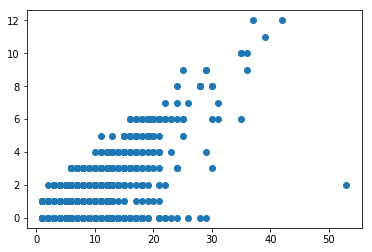

In [143]:
plt.show()

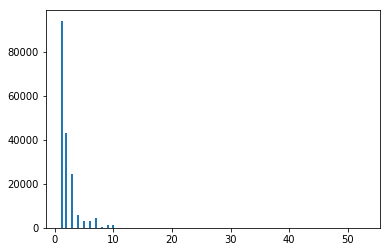

In [141]:
import matplotlib.pyplot as plt

plt.hist(feat['total_answers'],bins=150)
plt.show()

In [127]:
df_48=z[z.q_id==48].reset_index(drop=True)
df_48[df_48.entity_id==163829]

,visitor_id,score,id_x,is_guest,q_id,text,entity_id,is_visible,created,id_y
571,32744e67-c871-402f-c03c-2c333e5cdf9e_acce55_14...,1,271751,True,48,5,163829,False,2017-04-26 22:09:40.415612,7
1713,146e9e8b-8155-4071-c045-18643411fa39_acce55_14...,1,291455,True,48,5,163829,False,2017-05-03 09:31:39.848262,5
4237,7c7956c5-177b-4974-c92f-59fdc20a36ff_acce55_14...,0,248979,True,48,1,163829,False,2017-04-20 22:47:40.373143,1
6414,a49985c5-ad9d-4f83-cf21-048841b97fa7_acce55_14...,1,142710,True,48,7,163829,False,2017-03-23 07:44:15.505993,10
10167,9d648fe5-f78a-4cb1-ccb0-15226c0991fc_acce55_14...,1,202963,True,48,28,163829,False,2017-04-08 12:54:42.660052,5
11593,12e9b424-6c28-4645-c650-c8c952bb3e8a_acce55_14...,1,197881,True,48,14,163829,False,2017-04-06 22:59:42.65137,10
